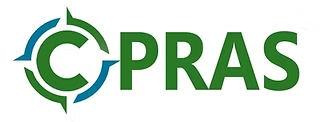

# **End-to-End Pipeline: EDA and MCDA on Climate Action Dataset for the SUSIE Project**

## 4. Exploratory Data Analysis

The final scoring dataset includes 134 unique universities and 364 unique city councils across the UK. Each merged file aggregates all available climate-related plans and reports from the same institution, enabling comprehensive, institution-level evaluation.

For each university:
- **Section 1:** 5 structural quality scores
- **Section 2:** 24 thematic implementation scores (8 dimensions × 3 sub-criteria)

For each city council:
- **Section 1:** 5 structural quality scores
- **Section 2:** 29 thematic implementation scores (10 dimensions, each with 2–4 sub-criteria)

In total:
- **Universities:** 670 Section 1 scores and 3,216 Section 2 scores
- **City Councils:** 1,820 Section 1 scores and 10,556 Section 2 scores

There are no missing values. Each score is linked to the institution, entity type, scoring dimension, (sub-)dimension code, the assigned score, and an explanatory justification.


### 4.1 Dataset Overview

In [ ]:
# === 1. Basic Setup ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# === 2. Load Data ===
city2_df = pd.read_excel("citycouncil_scores_section2.xlsx")
univ2_df = pd.read_excel("university_scores_section2.xlsx")

In [ ]:
# === 3. Data Overview ===
print("City Council Section 2 - Data Preview:")
display(city2_df.head())

print("\nUniversity Section 2 - Data Preview:")
display(univ2_df.head())

City Council Section 2 - Data Preview:


code            dimension  score  \
0   B1  Buildings and Homes    1.0   
1   B2  Buildings and Homes    0.5   
2   B3  Buildings and Homes    1.0   
3   B4  Buildings and Homes    0.5   
4   R1     Renewable Energy    1.0   

                                       justification           document  
0  The document outlines a specific retrofit poli...  Aberdeen City.txt  
1  Energy efficiency standards for new buildings ...  Aberdeen City.txt  
2  Low-carbon heating is promoted with incentives...  Aberdeen City.txt  
3  There is an aspirational mention of assessing ...  Aberdeen City.txt  
4  Support for local renewable energy deployment ...  Aberdeen City.txt


University Section 2 - Data Preview:


code             dimension  score  \
0   E1  Energy and Buildings    1.0   
1   E2  Energy and Buildings    1.0   
2   E3  Energy and Buildings    1.0   
3   T1    Sustainable Travel    0.5   
4   T2    Sustainable Travel    0.5   

                                       justification                document  
0  The university has a detailed plan for retrofi...  Abertay University.txt  
1  Regular energy audits are conducted annually, ...  Abertay University.txt  
2  All new constructions adhere to BREEAM Excelle...  Abertay University.txt  
3  The university mentions promoting public trans...  Abertay University.txt  
4  There is an intent to reduce air travel, but n...  Abertay University.txt

In [ ]:
# === Load Section 1 Data ===
city1_df = pd.read_excel('citycouncil_scores_section1.xlsx')
univ1_df = pd.read_excel('university_scores_section1.xlsx')

# === Preview Section 1 Data ===
print("City Council - Section 1 Preview:")
display(city1_df.head())

print("\nUniversity - Section 1 Preview:")
display(univ1_df.head())

City Council - Section 1 Preview:


dimension  score  \
0            Goals & Vision      3   
1  Scope of Sectors Covered      3   
2    Specificity of Actions      3   
3   Implementation Strategy      3   
4   Monitoring & Evaluation      3   

                                       justification  \
0  The document provides clear, time-bound, measu...   
1  The plan covers a wide range of sectors includ...   
2  Specific actions are detailed with operational...   
3  The implementation strategy is well defined, w...   
4  The plan includes a robust monitoring and eval...   

                    document  
0  Aberdeenshire Council.txt  
1  Aberdeenshire Council.txt  
2  Aberdeenshire Council.txt  
3  Aberdeenshire Council.txt  
4  Aberdeenshire Council.txt


University - Section 1 Preview:


dimension  score  \
0            Goals & Vision      3   
1  Scope of Sectors Covered      3   
2    Specificity of Actions      3   
3   Implementation Strategy      3   
4   Monitoring & Evaluation      3   

                                       justification                 document  
0  The document presents a clear vision with time...  Bath Spa University.txt  
1  The strategy covers a comprehensive range of s...  Bath Spa University.txt  
2  The document provides detailed actions with sp...  Bath Spa University.txt  
3  The strategy outlines a structured implementat...  Bath Spa University.txt  
4  There is a detailed plan for monitoring and ev...  Bath Spa University.txt

Dataset description

In [ ]:
city1_df.describe()

score
count  1820.000000
mean      2.512088
std       0.669255
min       0.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       3.000000

In [ ]:
univ1_df.describe()

score
count  670.000000
mean     2.568657
std      0.645024
min      0.000000
25%      2.000000
50%      3.000000
75%      3.000000
max      3.000000

In [ ]:
city2_df.describe()

score
count  10556.000000
mean       0.704197
std        0.283629
min        0.000000
25%        0.500000
50%        0.500000
75%        1.000000
max        1.000000

In [ ]:
univ2_df.describe()

score
count  3216.000000
mean      0.705068
std       0.326396
min       0.000000
25%       0.500000
50%       1.000000
75%       1.000000
max       1.000000

## 4.1 hecking for missing values: No missing values were found; all files have been scored.

In [ ]:
# === Check Missing Values in Section 1 ===
print("Missing Values - City Council Section 1:")
print(city1_df.isnull().sum())

print("\nMissing Values - University Section 1:")
print(univ1_df.isnull().sum())

Missing Values - City Council Section 1:
dimension        0
score            0
justification    0
document         0
dtype: int64

Missing Values - University Section 1:
dimension        0
score            0
justification    0
document         0
dtype: int64


In [ ]:
# === 4. Missing Value Check ===
print("\nMissing Values in City Council Data:")
print(city2_df.isnull().sum())

print("\nMissing Values in University Data:")
print(univ2_df.isnull().sum())


Missing Values in City Council Data:
code             0
dimension        0
score            0
justification    0
document         0
dtype: int64

Missing Values in University Data:
code             0
dimension        0
score            0
justification    0
document         0
dtype: int64


## 4.2 Aggregate by dimension: calculate the “average score for each dimension”.

Firstly section1:

In [ ]:
# === Section 1: Calculate Dimension-Level Average Scores ===

# --- City Council Section 1 ---
print("City Council Section 1 - Average Score by Dimension")
city1_dim_scores = city1_df.groupby('dimension')['score'].mean().round(2).reset_index()
city1_dim_scores.columns = ['Dimension', 'Average Score']
display(city1_dim_scores)

# --- University Section 1 ---
print("\nUniversity Section 1 - Average Score by Dimension")
univ1_dim_scores = univ1_df.groupby('dimension')['score'].mean().round(2).reset_index()
univ1_dim_scores.columns = ['Dimension', 'Average Score']
display(univ1_dim_scores)

City Council Section 1 - Average Score by Dimension


Dimension  Average Score
0            Goals & Vision           2.66
1   Implementation Strategy           2.26
2   Monitoring & Evaluation           2.37
3  Scope of Sectors Covered           2.87
4    Specificity of Actions           2.40


University Section 1 - Average Score by Dimension


Dimension  Average Score
0            Goals & Vision           2.66
1   Implementation Strategy           2.34
2   Monitoring & Evaluation           2.49
3  Scope of Sectors Covered           2.79
4    Specificity of Actions           2.56

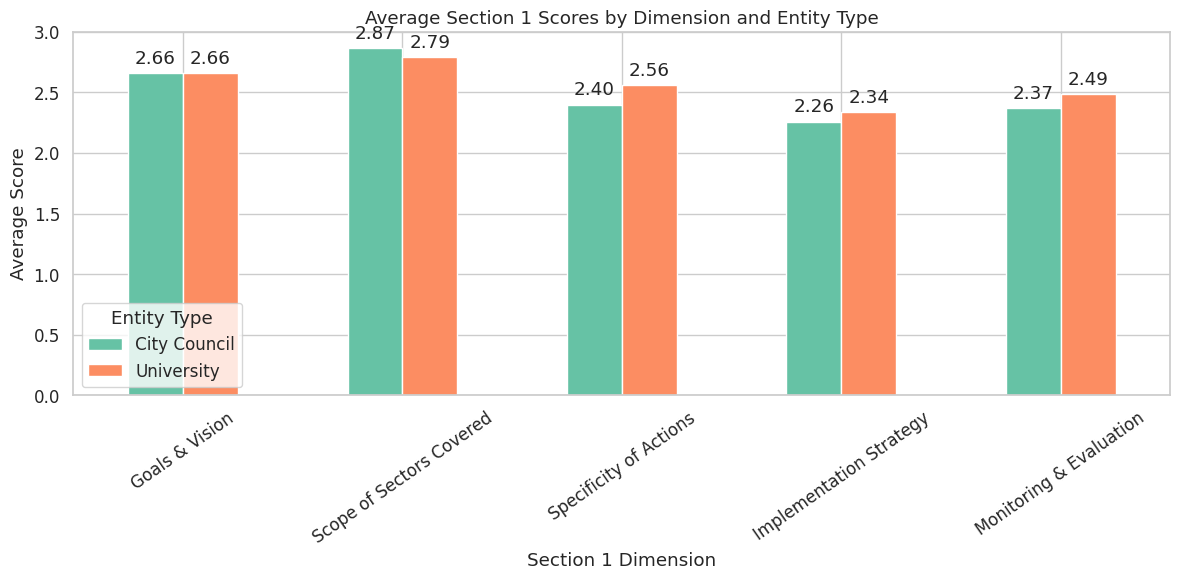

In [ ]:
import matplotlib.pyplot as plt

city1_dim_scores['Entity Type'] = 'City Council'
univ1_dim_scores['Entity Type'] = 'University'

all_dim_scores = pd.concat([city1_dim_scores, univ1_dim_scores], axis=0)

dimension_order = [
    'Goals & Vision',
    'Scope of Sectors Covered',
    'Specificity of Actions',
    'Implementation Strategy',
    'Monitoring & Evaluation'
]
all_dim_scores['Dimension'] = pd.Categorical(all_dim_scores['Dimension'], categories=dimension_order, ordered=True)
all_dim_scores = all_dim_scores.sort_values(['Dimension', 'Entity Type'])

pivot = all_dim_scores.pivot(index='Dimension', columns='Entity Type', values='Average Score')

ax = pivot.plot(kind='bar', figsize=(12, 6), rot=35)
plt.ylabel('Average Score')
plt.xlabel('Section 1 Dimension')
plt.title('Average Section 1 Scores by Dimension and Entity Type')
plt.legend(title='Entity Type')
plt.ylim(0, 3)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=4)

plt.show()

Then section2:

In [ ]:
# --- City Council Section 2 ---
print("City Council Section 2 - Average Score by Dimension")
city2_dim_scores = city2_df.groupby('dimension')['score'].mean().round(2).reset_index()
city2_dim_scores.columns = ['Dimension', 'Average Score']
display(city2_dim_scores)

# --- University Section 2 ---
print("\nUniversity Section 2 - Average Score by Dimension")
univ2_dim_scores = univ2_df.groupby('dimension')['score'].mean().round(2).reset_index()
univ2_dim_scores.columns = ['Dimension', 'Average Score']
display(univ2_dim_scores)

City Council Section 2 - Average Score by Dimension


Dimension  Average Score
0      Air Quality and Pollution Control           0.91
1                    Buildings and Homes           0.59
2     Community Engagement and Education           0.54
3     Governance, Monitoring and Finance           0.86
4  Green Infrastructure and Biodiversity           0.67
5    Planning and Regulatory Integration           0.73
6                       Renewable Energy           0.64
7                 Transport and Mobility           0.77
8             Waste and Circular Economy           0.64
9  Water Management and Flood Resilience           0.72


University Section 2 - Average Score by Dimension


Dimension  Average Score
0   Campus Biodiversity and Greenspace           0.58
1  Community and Governance Engagement           0.94
2   Education and Research Integration           0.82
3                 Energy and Buildings           0.82
4        Food Systems and Supply Chain           0.79
5                   Sustainable Travel           0.57
6           Waste and Circular Economy           0.66
7               Water and Resource Use           0.46

Then Generate an average radar chart for different sections

section1：

In [ ]:
def plot_radar_chart(dim_scores, title, color):
    # Extract labels and values
    labels = dim_scores['Dimension'].tolist()
    values = dim_scores['Average Score'].tolist()

    # Store original length for angular calculation
    num_vars = len(labels)

    # Close the radar loop by repeating the first value
    values += values[:1]
    labels += labels[:1]

    # Calculate angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Create the radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, color=color, linewidth=2)
    ax.fill(angles, values, color=color, alpha=0.25)

    # Format chart
    ax.set_yticks([0.6, 1.2, 1.8, 2.4, 3.0])
    ax.set_ylim(0, 3.0)
    ax.set_xticks(angles)
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_title(title, fontsize=12, y=1.1)
    plt.tight_layout()
    plt.show()


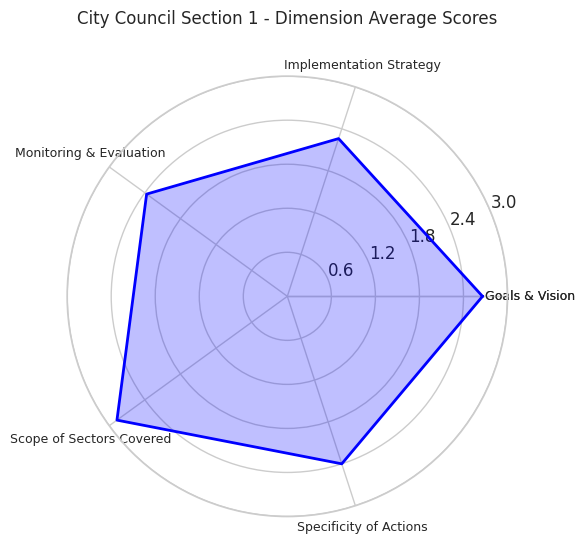

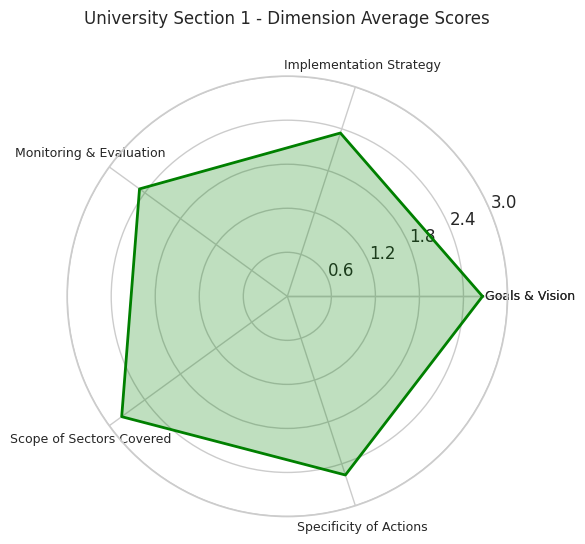

In [ ]:
# Plot for City Council Section 1
plot_radar_chart(city1_dim_scores, 'City Council Section 1 - Dimension Average Scores', color='blue')

# Plot for University Section 1
plot_radar_chart(univ1_dim_scores, 'University Section 1 - Dimension Average Scores', color='green')

In [ ]:
import textwrap

def plot_radar_chart(dim_scores, title, color):
    labels = dim_scores['Dimension'].tolist()

    labels = ['\n'.join(textwrap.wrap(l, 18)) for l in labels]
    values = dim_scores['Average Score'].tolist()
    num_vars = len(labels)
    values += values[:1]
    labels += labels[:1]
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.plot(angles, values, color=color, linewidth=2)
    ax.fill(angles, values, color=color, alpha=0.25)

    ax.set_xticks(angles)
    ax.set_xticklabels(labels, fontsize=10, ha='center')

    plt.subplots_adjust(top=0.88, bottom=0.05)
    ax.set_yticks(np.arange(0, 1.1, 0.2))
    ax.set_ylim(0, 1.0)
    ax.set_title(title, fontsize=16, y=1.13)
    plt.tight_layout()
    plt.show()

section2：

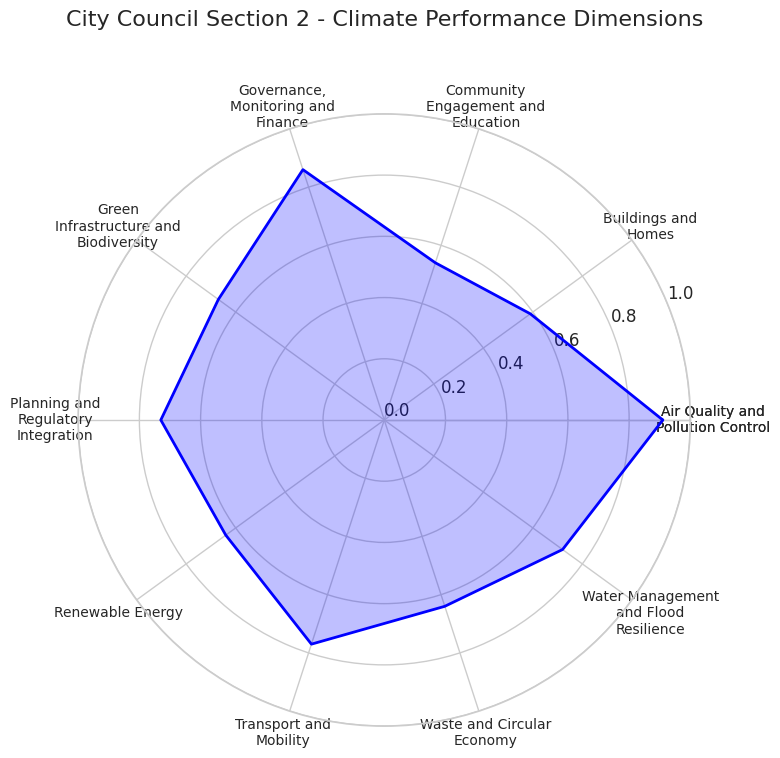

In [ ]:
# City Council Section 2
plot_radar_chart(city2_dim_scores, 'City Council Section 2 - Climate Performance Dimensions', color='blue')

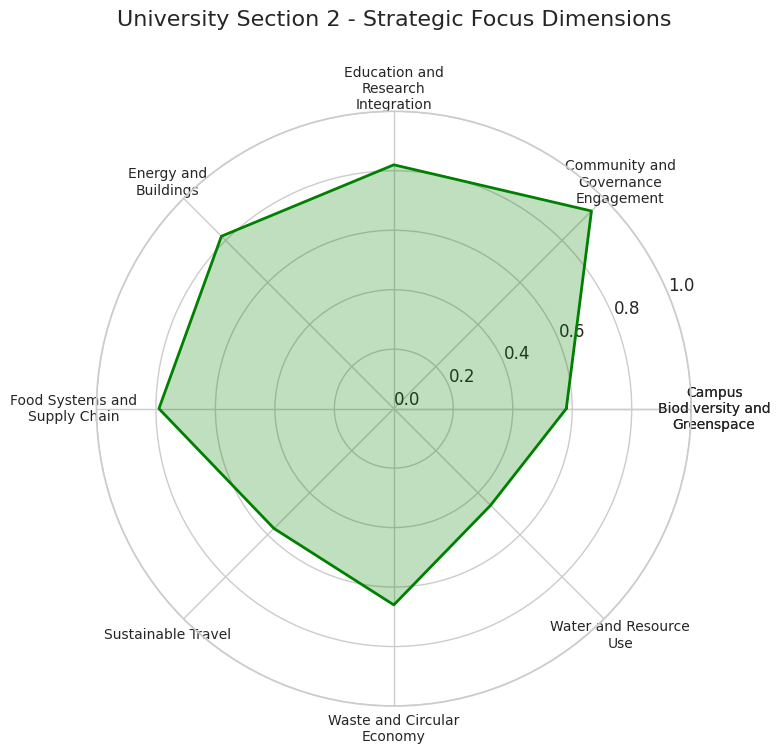

In [ ]:
# University Section 2
plot_radar_chart(univ2_dim_scores, 'University Section 2 - Strategic Focus Dimensions', color='green')

Box plot of 2 sections

section1:

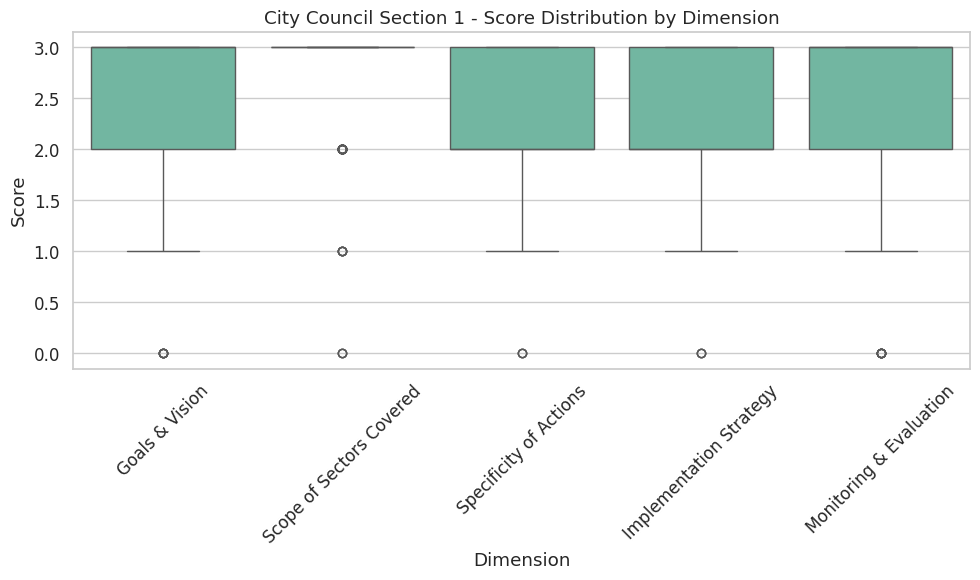

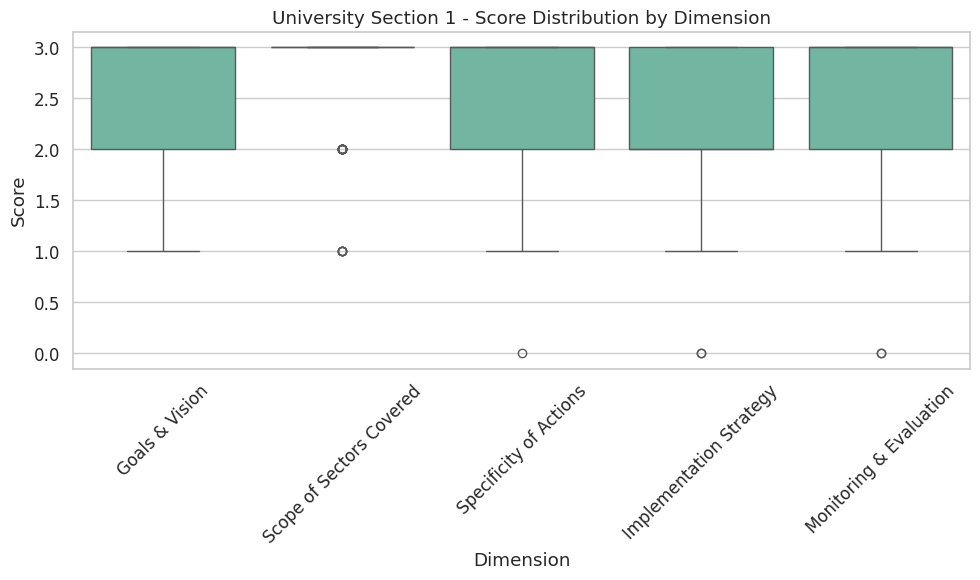

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Boxplot for City Council Section 1 ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=city1_df, x='dimension', y='score')
plt.title('City Council Section 1 - Score Distribution by Dimension')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.xlabel('Dimension')
plt.tight_layout()
plt.show()

# --- Boxplot for University Section 1 ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=univ1_df, x='dimension', y='score')
plt.title('University Section 1 - Score Distribution by Dimension')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.xlabel('Dimension')
plt.tight_layout()
plt.show()

section2:

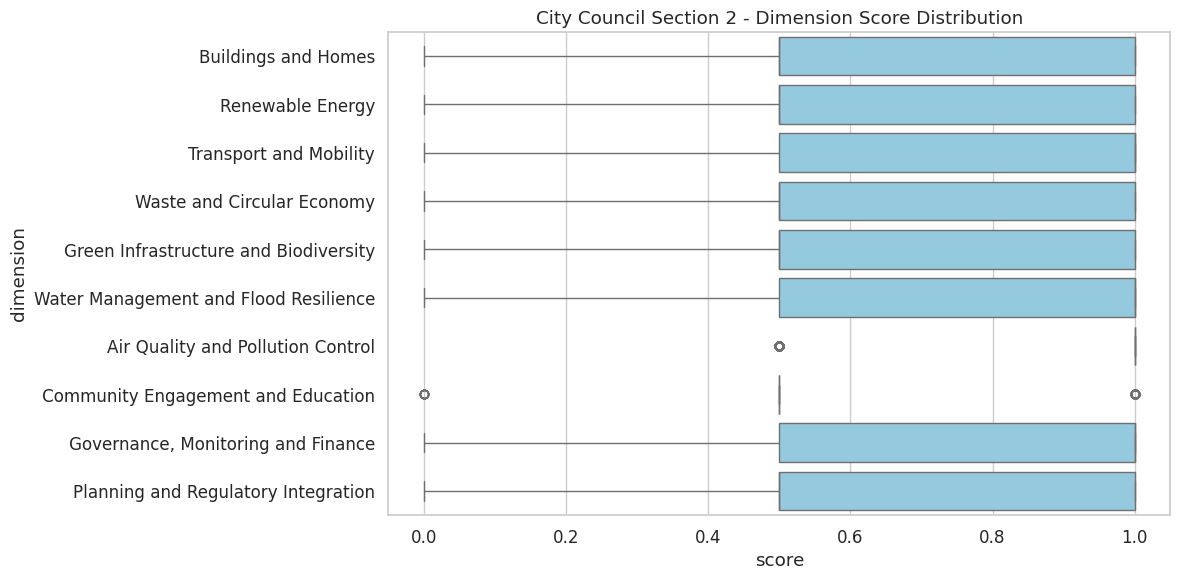

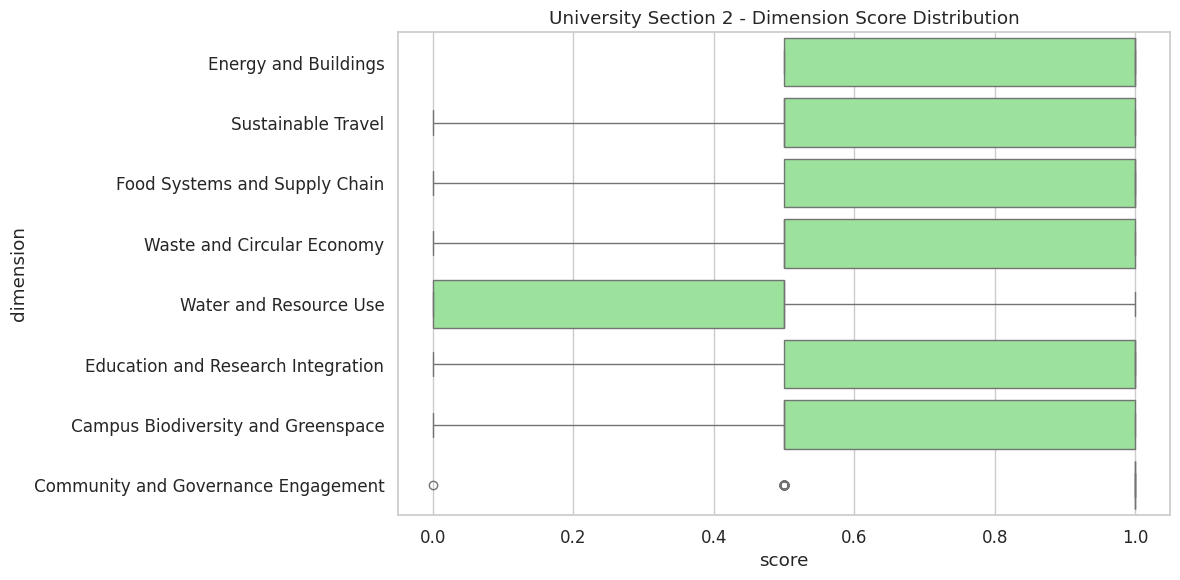

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=city2_df, x='score', y='dimension', color='skyblue')
plt.title("City Council Section 2 - Dimension Score Distribution")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=univ2_df, x='score', y='dimension', color='lightgreen')
plt.title("University Section 2 - Dimension Score Distribution")
plt.tight_layout()
plt.show()

### 4.3 Examine the distribution of the top 10 sub-questions by Section 2 score.

For universities:

In [ ]:
# === University: top 10 scoring questions ===
univ_question_stats = (
    univ2_df.groupby(['code', 'dimension'])['score']
    .agg(['mean', 'std', 'count'])
    .reset_index()
    .round(2)
)

top10_univ = univ_question_stats.sort_values(by='mean', ascending=False).head(10)
print("🔝 Top 10 Highest Scoring Questions (University)")
display(top10_univ)

# === City Council: top 10 scoring questions ===
city_question_stats = (
    city2_df.groupby(['code', 'dimension'])['score']
    .agg(['mean', 'std', 'count'])
    .reset_index()
    .round(2)
)

top10_city = city_question_stats.sort_values(by='mean', ascending=False).head(10)
print("🔝 Top 10 Highest Scoring Questions (City Council)")
display(top10_city)

🔝 Top 10 Highest Scoring Questions (University)


code                            dimension  mean   std  count
0    C1  Community and Governance Engagement  1.00  0.00    134
15   R1   Education and Research Integration  1.00  0.00    134
21   W1           Waste and Circular Economy  1.00  0.00    134
16   R2   Education and Research Integration  0.96  0.14    134
6    F1        Food Systems and Supply Chain  0.94  0.17    134
5    E3                 Energy and Buildings  0.93  0.17    134
3    E1                 Energy and Buildings  0.93  0.17    134
1    C2  Community and Governance Engagement  0.93  0.18    134
9    G1   Campus Biodiversity and Greenspace  0.89  0.21    134
2    C3  Community and Governance Engagement  0.88  0.22    134

🔝 Top 10 Highest Scoring Questions (City Council)


code                              dimension  mean   std  count
14   M1     Governance, Monitoring and Finance  1.00  0.00    364
22   T1                 Transport and Mobility  1.00  0.00    364
11   G1  Green Infrastructure and Biodiversity  0.99  0.06    364
0    A1      Air Quality and Pollution Control  0.98  0.11    364
19   R1                       Renewable Energy  0.98  0.11    364
9    F2  Water Management and Flood Resilience  0.97  0.12    364
17   P1    Planning and Regulatory Integration  0.96  0.13    364
26   W1             Waste and Circular Economy  0.95  0.15    364
15   M2     Governance, Monitoring and Finance  0.93  0.17    364
3    B2                    Buildings and Homes  0.92  0.18    364

In [ ]:
# === Create Code-to-Question Mapping Table ===
univ_question_map = [
    ['E1', 'Energy and Buildings', 'Does the university address building retrofits or energy efficiency upgrades?'],
    ['E2', 'Energy and Buildings', 'Are there energy audits or measurement mechanisms in place?'],
    ['E3', 'Energy and Buildings', 'Are sustainable standards used in new construction (e.g., BREEAM)?'],
    ['T1', 'Sustainable Travel', 'Are there policies promoting walking, cycling, or public transport?'],
    ['T2', 'Sustainable Travel', 'Are there measures to reduce air travel?'],
    ['T3', 'Sustainable Travel', 'Are there vehicle fleet electrification or emissions targets?'],
    ['F1', 'Food Systems and Supply Chain', 'Are plant-based or low-emission food choices promoted?'],
    ['F2', 'Food Systems and Supply Chain', 'Are food waste reduction strategies included?'],
    ['F3', 'Food Systems and Supply Chain', 'Is sustainable food procurement (e.g., local, seasonal) mentioned?'],
    ['W1', 'Waste and Circular Economy', 'Is waste separation and recycling implemented?'],
    ['W2', 'Waste and Circular Economy', 'Are there targets for waste reduction?'],
    ['W3', 'Waste and Circular Economy', 'Are circular economy initiatives promoted?'],
    ['P1', 'Water and Resource Use', 'Are there targets to reduce water usage?'],
    ['P2', 'Water and Resource Use', 'Are water recycling measures implemented?'],
    ['P3', 'Water and Resource Use', 'Are water-saving devices promoted?'],
    ['R1', 'Education and Research Integration', 'Is sustainability integrated into the curriculum?'],
    ['R2', 'Education and Research Integration', 'Are sustainability research projects supported?'],
    ['R3', 'Education and Research Integration', 'Are training programs in place for sustainability?'],
    ['G1', 'Campus Biodiversity and Greenspace', 'Is there a biodiversity protection plan?'],
    ['G2', 'Campus Biodiversity and Greenspace', 'Are greenery expansion projects underway?'],
    ['G3', 'Campus Biodiversity and Greenspace', 'Is ecological collaboration with the community promoted?'],
    ['C1', 'Community and Governance Engagement', 'Is there a sustainability governance committee?'],
    ['C2', 'Community and Governance Engagement', 'Is there collaboration with students and staff on sustainability policies?'],
    ['C3', 'Community and Governance Engagement', 'Are sustainability reports publicly disclosed?'],
]

univ_question_map_df = pd.DataFrame(univ_question_map, columns=['code', 'dimension', 'question'])
display(univ_question_map_df.head())

code             dimension  \
0   E1  Energy and Buildings   
1   E2  Energy and Buildings   
2   E3  Energy and Buildings   
3   T1    Sustainable Travel   
4   T2    Sustainable Travel   

                                            question  
0  Does the university address building retrofits...  
1  Are there energy audits or measurement mechani...  
2  Are sustainable standards used in new construc...  
3  Are there policies promoting walking, cycling,...  
4           Are there measures to reduce air travel?

/tmp/ipython-input-22-543302776.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


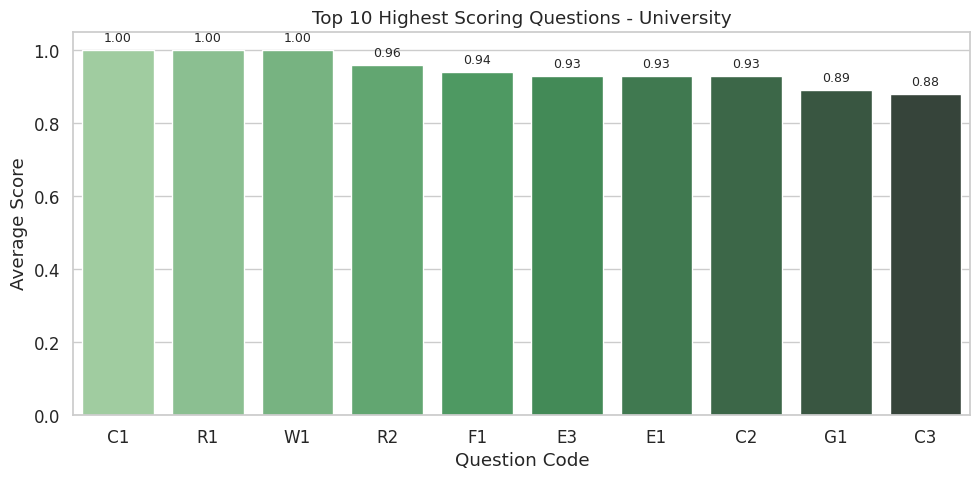

In [ ]:
# === University Barplot (fixed label positions) ===
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=top10_univ,
    x='code', y='mean',
    palette='Greens_d'
)
plt.title("Top 10 Highest Scoring Questions - University")
plt.xlabel("Question Code")
plt.ylabel("Average Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)

# Correctly place labels at bar center using bar containers
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y + 0.015, f"{y:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# === Merge top10_univ with question definitions ===
top10_univ_labeled = pd.merge(top10_univ, univ_question_map_df, on='code', how='left')

# Select and reorder columns for clarity
top10_univ_labeled = top10_univ_labeled[['code', 'dimension_y', 'question', 'mean', 'std', 'count']]
top10_univ_labeled.columns = ['Code', 'Dimension', 'Question Text', 'Avg Score', 'Std Dev', 'N']

# Display the table
print("🟩 Top 10 University Questions - Full Description")
display(top10_univ_labeled)

🟩 Top 10 University Questions - Full Description


Code                            Dimension  \
0   C1  Community and Governance Engagement   
1   R1   Education and Research Integration   
2   W1           Waste and Circular Economy   
3   R2   Education and Research Integration   
4   F1        Food Systems and Supply Chain   
5   E3                 Energy and Buildings   
6   E1                 Energy and Buildings   
7   C2  Community and Governance Engagement   
8   G1   Campus Biodiversity and Greenspace   
9   C3  Community and Governance Engagement   

                                       Question Text  Avg Score  Std Dev    N  
0    Is there a sustainability governance committee?       1.00     0.00  134  
1  Is sustainability integrated into the curriculum?       1.00     0.00  134  
2     Is waste separation and recycling implemented?       1.00     0.00  134  
3    Are sustainability research projects supported?       0.96     0.14  134  
4  Are plant-based or low-emission food choices p...       0.94     0.17  134  
5  Are sustainable standards used in new construc...       0.93     0.17  134  
6  Does the university address building retrofits...       0.93     0.17  134  
7  Is there collaboration with students and staff...       0.93     0.18  134  
8           Is there a biodiversity protection plan?       0.89     0.21  134  
9     Are sustainability reports publicly disclosed?       0.88     0.22  134

Obtain the distribution of the bottom 10 sub-questions by university score.

In [ ]:
# === Bottom 10 scoring questions for University ===
bottom10_univ = univ_question_stats.sort_values(by='mean', ascending=True).head(10)

# === Merge with full question mapping ===
bottom10_univ_labeled = pd.merge(bottom10_univ, univ_question_map_df, on='code', how='left')

# Reorder and rename columns
bottom10_univ_labeled = bottom10_univ_labeled[['code', 'dimension_y', 'question', 'mean', 'std', 'count']]
bottom10_univ_labeled.columns = ['Code', 'Dimension', 'Question Text', 'Avg Score', 'Std Dev', 'N']

print("🟥 Bottom 10 University Questions - Full Description")
display(bottom10_univ_labeled)

🟥 Bottom 10 University Questions - Full Description


Code                           Dimension  \
0   P2              Water and Resource Use   
1   G3  Campus Biodiversity and Greenspace   
2   T2                  Sustainable Travel   
3   W3          Waste and Circular Economy   
4   T3                  Sustainable Travel   
5   R3  Education and Research Integration   
6   P1              Water and Resource Use   
7   W2          Waste and Circular Economy   
8   E2                Energy and Buildings   
9   G2  Campus Biodiversity and Greenspace   

                                       Question Text  Avg Score  Std Dev    N  
0          Are water recycling measures implemented?       0.14     0.23  134  
1  Is ecological collaboration with the community...       0.26     0.29  134  
2           Are there measures to reduce air travel?       0.39     0.23  134  
3         Are circular economy initiatives promoted?       0.40     0.25  134  
4  Are there vehicle fleet electrification or emi...       0.47     0.35  134  
5  Are training programs in place for sustainabil...       0.50     0.13  134  
6           Are there targets to reduce water usage?       0.57     0.25  134  
7             Are there targets for waste reduction?       0.57     0.19  134  
8  Are there energy audits or measurement mechani...       0.59     0.20  134  
9          Are greenery expansion projects underway?       0.60     0.23  134

/tmp/ipython-input-25-1317260579.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


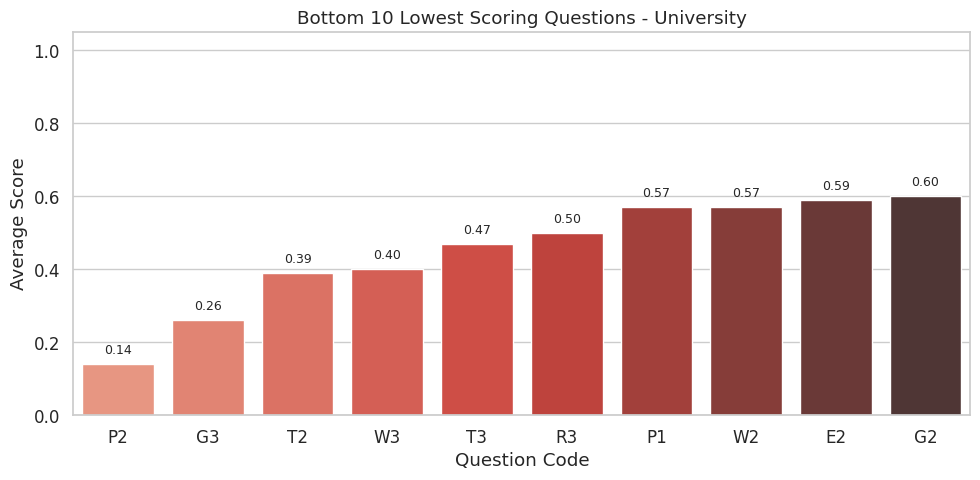

In [ ]:
# === Barplot for Bottom 10 University Questions ===
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=bottom10_univ,
    x='code', y='mean',
    palette='Reds_d'
)
plt.title("Bottom 10 Lowest Scoring Questions - University")
plt.xlabel("Question Code")
plt.ylabel("Average Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)

# Add score labels
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y + 0.02, f"{y:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

For City councils

In [ ]:
city_questions_data = [
    ['B1', 'Buildings and Homes', 'Is there a retrofit policy for existing homes?'],
    ['B2', 'Buildings and Homes', 'Are energy efficiency standards specified for new buildings?'],
    ['B3', 'Buildings and Homes', 'Is low-carbon heating (e.g. heat pumps) promoted?'],
    ['B4', 'Buildings and Homes', 'Are residential developments required to assess carbon impact?'],
    ['R1', 'Renewable Energy', 'Is support given for local renewable energy deployment?'],
    ['R2', 'Renewable Energy', 'Are solar energy deployment targets included?'],
    ['R3', 'Renewable Energy', 'Are community energy projects promoted?'],
    ['T1', 'Transport and Mobility', 'Is EV charging infrastructure planned?'],
    ['T2', 'Transport and Mobility', 'Is low-carbon transition of public transport promoted?'],
    ['T3', 'Transport and Mobility', 'Is there an Active Travel (walking/cycling) policy?'],
    ['T4', 'Transport and Mobility', 'Is behaviour change for sustainable travel supported?'],
    ['W1', 'Waste and Circular Economy', 'Are targets set for improving recycling rates?'],
    ['W2', 'Waste and Circular Economy', 'Are there requirements for construction waste management?'],
    ['W3', 'Waste and Circular Economy', 'Are reuse/zero-waste initiatives encouraged?'],
    ['G1', 'Green Infrastructure and Biodiversity', 'Is there a plan to expand urban greenery?'],
    ['G2', 'Green Infrastructure and Biodiversity', 'Are biodiversity targets defined?'],
    ['G3', 'Green Infrastructure and Biodiversity', 'Is community participation in nature restoration promoted?'],
    ['F1', 'Water Management and Flood Resilience', 'Are water efficiency targets defined?'],
    ['F2', 'Water Management and Flood Resilience', 'Are Sustainable Drainage Systems (SuDS) promoted?'],
    ['F3', 'Water Management and Flood Resilience', 'Is there a flood risk management mechanism?'],
    ['A1', 'Air Quality and Pollution Control', 'Are there air quality improvement targets?'],
    ['A2', 'Air Quality and Pollution Control', 'Are AQMAs or similar control zones established?'],
    ['C1', 'Community Engagement and Education', 'Is carbon literacy training provided?'],
    ['C2', 'Community Engagement and Education', 'Are school/youth engagement mechanisms in place?'],
    ['M1', 'Governance, Monitoring and Finance', 'Is a Net Zero target (with timeline) established?'],
    ['M2', 'Governance, Monitoring and Finance', 'Is there annual monitoring/reporting of progress?'],
    ['M3', 'Governance, Monitoring and Finance', 'Is specific budget/funding allocated?'],
    ['P1', 'Planning and Regulatory Integration', 'Are climate policies integrated into planning frameworks?'],
    ['P2', 'Planning and Regulatory Integration', 'Are policy tools used to control development-related carbon impacts?'],
]
city_question_map_df = pd.DataFrame(city_questions_data, columns=['code', 'dimension', 'question'])

In [ ]:
# Merge with mapping for TOP 10
top10_city_labeled = pd.merge(top10_city, city_question_map_df, on='code', how='left')
top10_city_labeled = top10_city_labeled[['code', 'dimension_y', 'question', 'mean', 'std', 'count']]
top10_city_labeled.columns = ['Code', 'Dimension', 'Question Text', 'Avg Score', 'Std Dev', 'N']
display(top10_city_labeled)

Code                              Dimension  \
0   M1     Governance, Monitoring and Finance   
1   T1                 Transport and Mobility   
2   G1  Green Infrastructure and Biodiversity   
3   A1      Air Quality and Pollution Control   
4   R1                       Renewable Energy   
5   F2  Water Management and Flood Resilience   
6   P1    Planning and Regulatory Integration   
7   W1             Waste and Circular Economy   
8   M2     Governance, Monitoring and Finance   
9   B2                    Buildings and Homes   

                                       Question Text  Avg Score  Std Dev    N  
0  Is a Net Zero target (with timeline) established?       1.00     0.00  364  
1             Is EV charging infrastructure planned?       1.00     0.00  364  
2          Is there a plan to expand urban greenery?       0.99     0.06  364  
3         Are there air quality improvement targets?       0.98     0.11  364  
4  Is support given for local renewable energy de...       0.98     0.11  364  
5  Are Sustainable Drainage Systems (SuDS) promoted?       0.97     0.12  364  
6  Are climate policies integrated into planning ...       0.96     0.13  364  
7     Are targets set for improving recycling rates?       0.95     0.15  364  
8  Is there annual monitoring/reporting of progress?       0.93     0.17  364  
9  Are energy efficiency standards specified for ...       0.92     0.18  364

/tmp/ipython-input-28-1420004978.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_city, x='code', y='mean', palette='Greens_d')


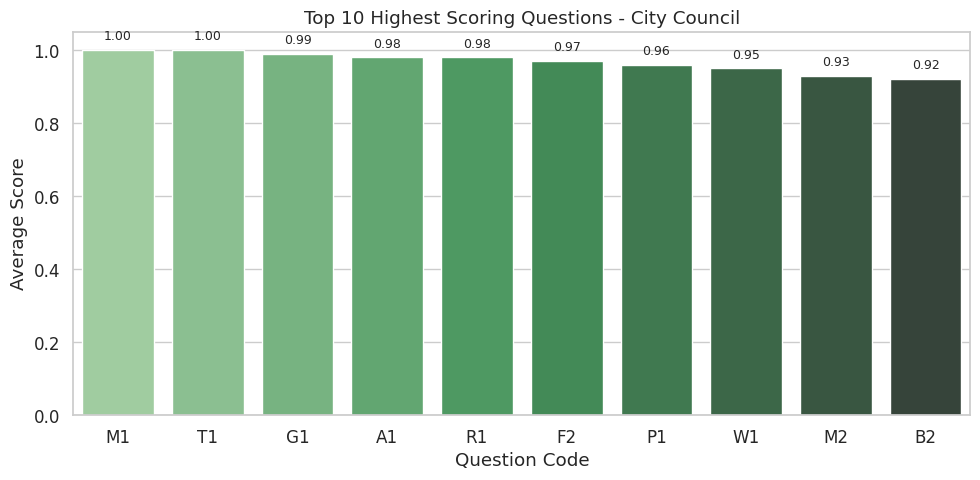

In [ ]:
# Barplot for Top 10
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=top10_city, x='code', y='mean', palette='Greens_d')
plt.title("Top 10 Highest Scoring Questions - City Council")
plt.xlabel("Question Code")
plt.ylabel("Average Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y + 0.02, f"{y:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Group by question code, calculate mean
city_question_scores = city2_df.groupby('code')['score'].agg(['mean', 'std', 'count']).reset_index()

# Select bottom 10 by average score
bottom10_city = city_question_scores.sort_values(by='mean', ascending=True).head(10)

# Merge with mapping for BOTTOM 10
bottom10_city_labeled = pd.merge(bottom10_city, city_question_map_df, on='code', how='left')
bottom10_city_labeled = bottom10_city_labeled[['code', 'dimension', 'question', 'mean', 'std', 'count']]
bottom10_city_labeled.columns = ['Code', 'Dimension', 'Question Text', 'Avg Score', 'Std Dev', 'N']
display(bottom10_city_labeled)

Code                              Dimension  \
0   B4                    Buildings and Homes   
1   F1  Water Management and Flood Resilience   
2   W2             Waste and Circular Economy   
3   R2                       Renewable Energy   
4   R3                       Renewable Energy   
5   P2    Planning and Regulatory Integration   
6   C1     Community Engagement and Education   
7   T4                 Transport and Mobility   
8   G2  Green Infrastructure and Biodiversity   
9   W3             Waste and Circular Economy   

                                       Question Text  Avg Score   Std Dev    N  
0  Are residential developments required to asses...   0.273352  0.272987  364  
1              Are water efficiency targets defined?   0.390110  0.217070  364  
2  Are there requirements for construction waste ...   0.468407  0.137737  364  
3      Are solar energy deployment targets included?   0.471154  0.127997  364  
4            Are community energy projects promoted?   0.475275  0.221300  364  
5  Are policy tools used to control development-r...   0.493132  0.069092  364  
6              Is carbon literacy training provided?   0.493132  0.078429  364  
7  Is behaviour change for sustainable travel sup...   0.497253  0.037011  364  
8                  Are biodiversity targets defined?   0.502747  0.090867  364  
9       Are reuse/zero-waste initiatives encouraged?   0.512363  0.175609  364

/tmp/ipython-input-30-4229503570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=bottom10_city, x='code', y='mean', palette='Reds_d')


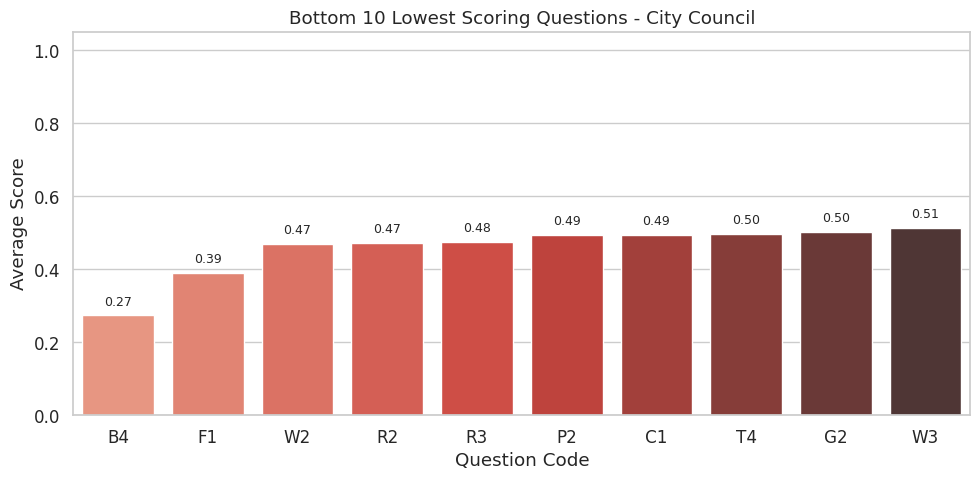

In [ ]:
# Barplot for Bottom 10
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=bottom10_city, x='code', y='mean', palette='Reds_d')
plt.title("Bottom 10 Lowest Scoring Questions - City Council")
plt.xlabel("Question Code")
plt.ylabel("Average Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y + 0.02, f"{y:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### 4.4 Examine the correlations between dimension scores.

section1：

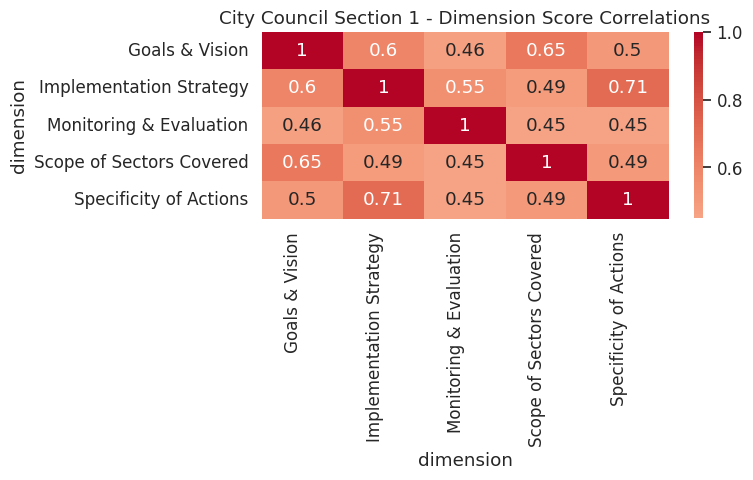

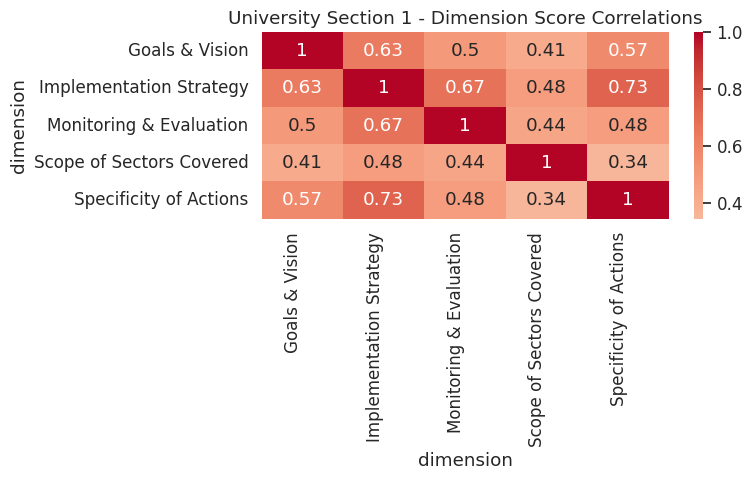

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# === Correlation Heatmap: City Council Section 1 ===
city1_dim_matrix = city1_df.pivot_table(index='document', columns='dimension', values='score', aggfunc='mean')
city1_corr = city1_dim_matrix.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(city1_corr, annot=True, cmap='coolwarm', center=0)
plt.title('City Council Section 1 - Dimension Score Correlations')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# === Correlation Heatmap: University Section 1 ===
univ1_dim_matrix = univ1_df.pivot_table(index='document', columns='dimension', values='score', aggfunc='mean')
univ1_corr = univ1_dim_matrix.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(univ1_corr, annot=True, cmap='coolwarm', center=0)
plt.title('University Section 1 - Dimension Score Correlations')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

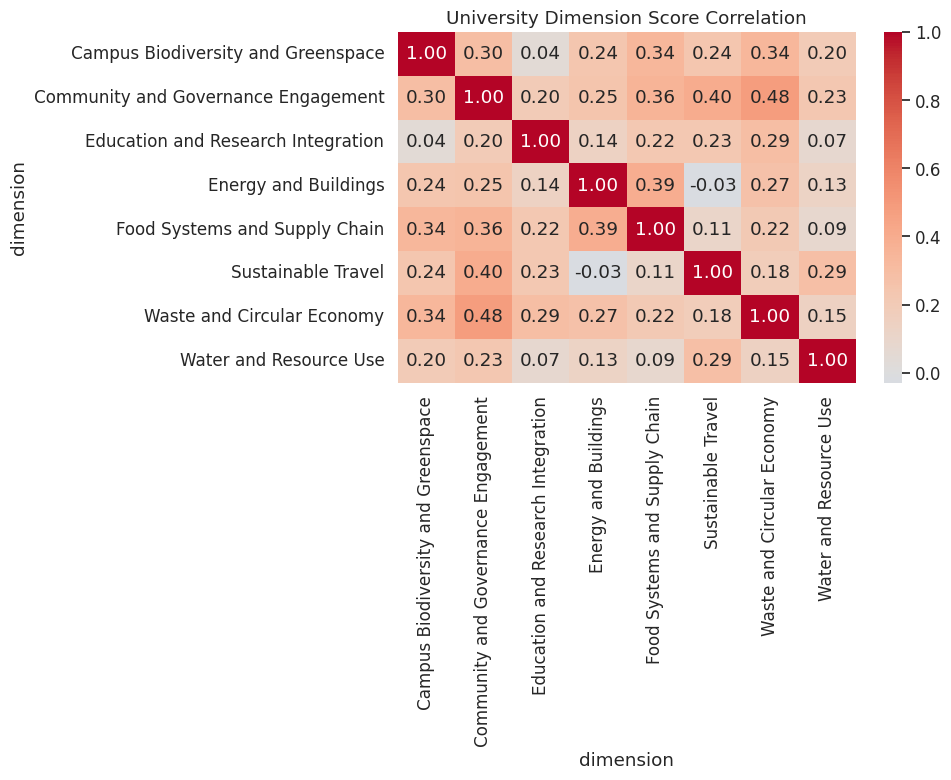

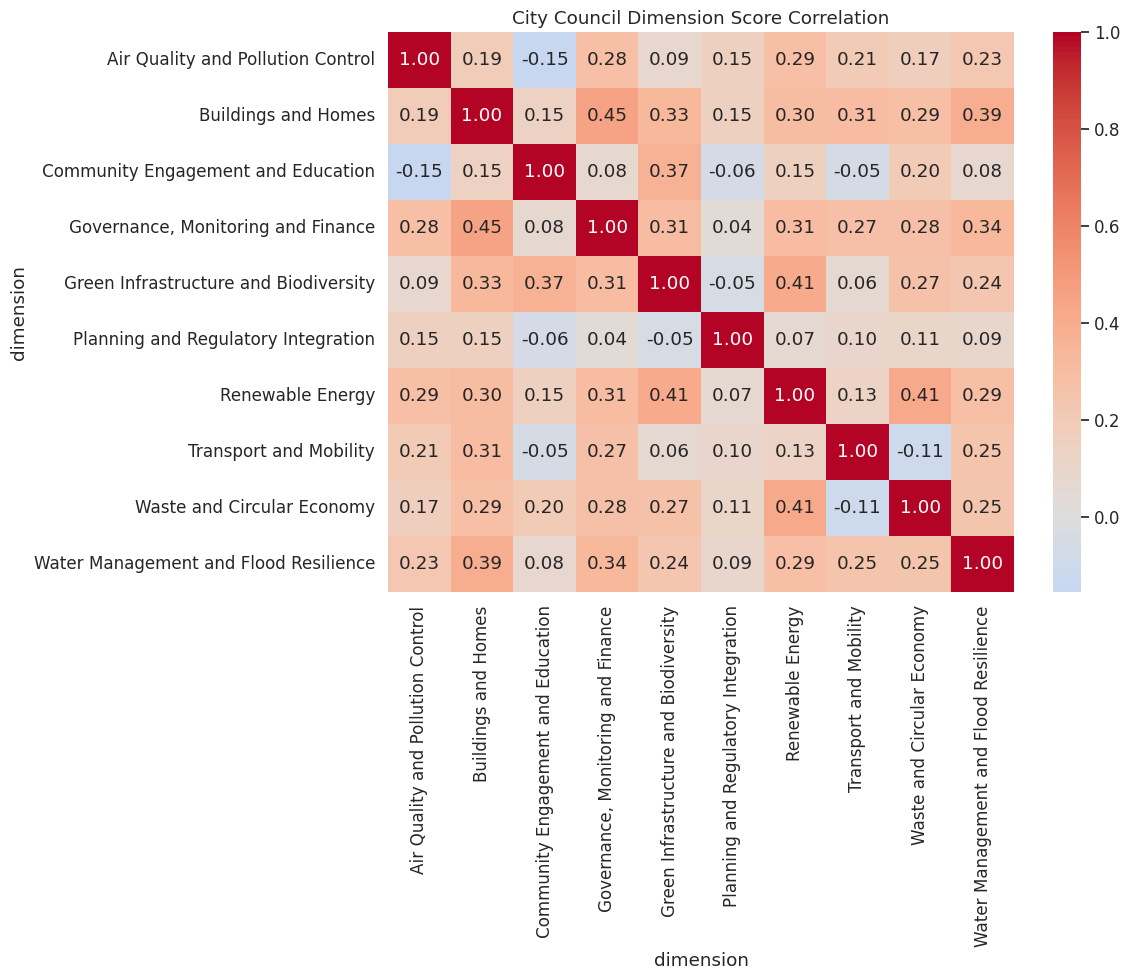

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- For University ---
univ_wide = univ2_df.pivot_table(index='document', columns='dimension', values='score', aggfunc='mean')
univ_corr = univ_wide.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(univ_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('University Dimension Score Correlation')
plt.tight_layout()
plt.show()

# --- For City Council ---
city_wide = city2_df.pivot_table(index='document', columns='dimension', values='score', aggfunc='mean')
city_corr = city_wide.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(city_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('City Council Dimension Score Correlation')
plt.tight_layout()
plt.show()

### 4.5  Conduct an analysis of differences between entities (identifying which performed best and worst).

/tmp/ipython-input-33-2873028349.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=univ_doc_scores.head(10), x='score', y='document', palette='Greens_r')


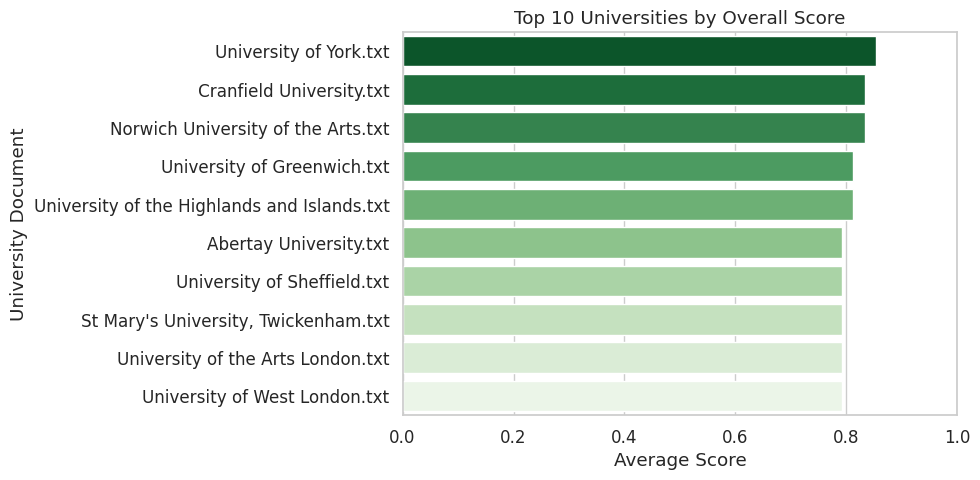

/tmp/ipython-input-33-2873028349.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=univ_doc_scores.tail(10), x='score', y='document', palette='Reds')


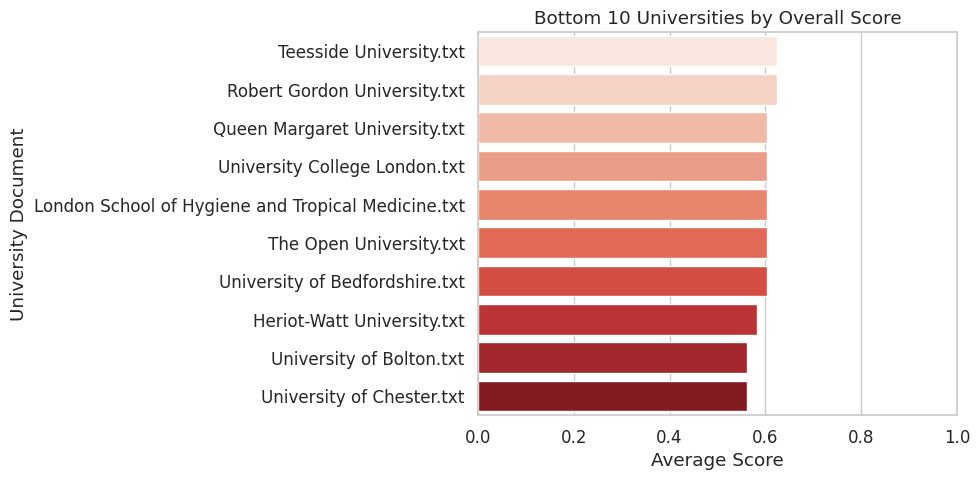

/tmp/ipython-input-33-2873028349.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_doc_scores.head(10), x='score', y='document', palette='Blues_r')


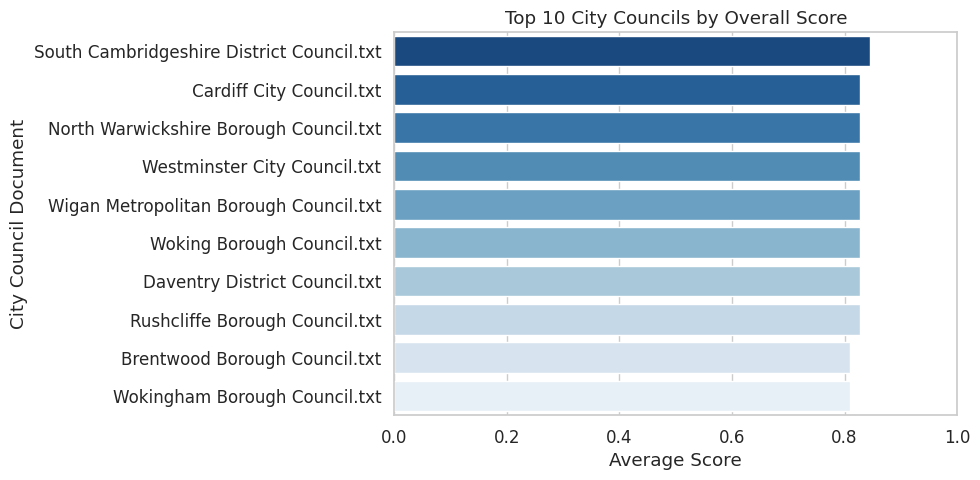

/tmp/ipython-input-33-2873028349.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_doc_scores.tail(10), x='score', y='document', palette='Oranges')


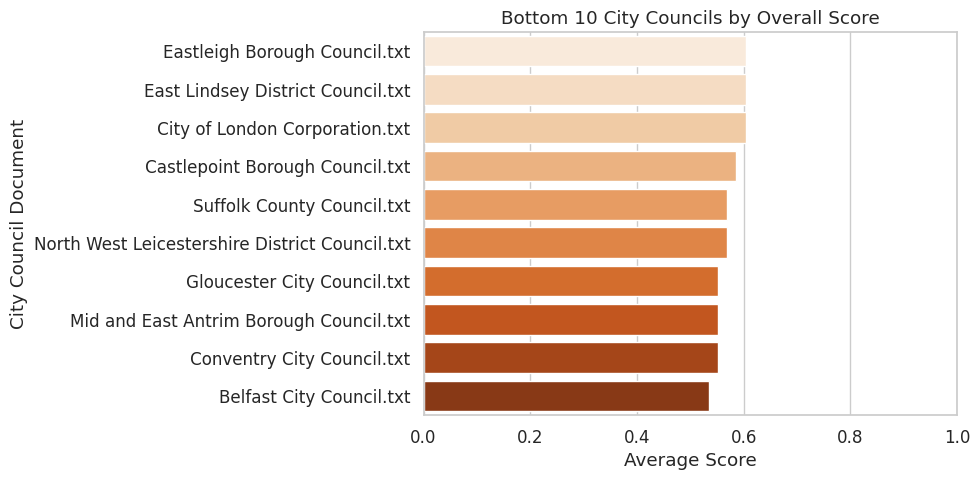

In [ ]:
# --- ① Average score per university document ---
univ_doc_scores = univ2_df.groupby('document')['score'].mean().reset_index()
univ_doc_scores = univ_doc_scores.sort_values(by='score', ascending=False)

# Plot Top 10 and Bottom 10
plt.figure(figsize=(10, 5))
sns.barplot(data=univ_doc_scores.head(10), x='score', y='document', palette='Greens_r')
plt.title('Top 10 Universities by Overall Score')
plt.xlabel('Average Score')
plt.ylabel('University Document')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=univ_doc_scores.tail(10), x='score', y='document', palette='Reds')
plt.title('Bottom 10 Universities by Overall Score')
plt.xlabel('Average Score')
plt.ylabel('University Document')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# --- ② Average score per city council document ---
city_doc_scores = city2_df.groupby('document')['score'].mean().reset_index()
city_doc_scores = city_doc_scores.sort_values(by='score', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=city_doc_scores.head(10), x='score', y='document', palette='Blues_r')
plt.title('Top 10 City Councils by Overall Score')
plt.xlabel('Average Score')
plt.ylabel('City Council Document')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=city_doc_scores.tail(10), x='score', y='document', palette='Oranges')
plt.title('Bottom 10 City Councils by Overall Score')
plt.xlabel('Average Score')
plt.ylabel('City Council Document')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

### 4.6 Explore the “questions that are easy to score highly”:

*   Which questions generally receive high scores (possibly because they are simpler, more common, or broadly defined);
*   Which questions have highly dispersed scores (indicating large differences, strong subjectivity, or uneven policy distribution);


In [ ]:
# --- Function to calculate question-level stats ---
def question_stats(df):
    return df.groupby('code')['score'].agg(['mean', 'std', 'count']).reset_index()

# === 1. University - Top 10 Easy Questions ===
univ_q_stats = question_stats(univ2_df).sort_values(by='mean', ascending=False).head(10)
univ_easy_qs = pd.merge(univ_q_stats, univ_question_map_df, on='code')

print("\n📘 University - Top 10 Questions with Highest Average Scores:")
display(univ_easy_qs[['code', 'dimension', 'question', 'mean', 'std']])

# === 2. University - Top 10 Controversial Questions ===
univ_q_stats_std = question_stats(univ2_df).sort_values(by='std', ascending=False).head(10)
univ_controversial_qs = pd.merge(univ_q_stats_std, univ_question_map_df, on='code')

print("\n⚖️ University - Top 10 Most Controversial Questions (Highest Std Dev):")
display(univ_controversial_qs[['code', 'dimension', 'question', 'mean', 'std']])

# === 3. City Council - Top 10 Easy Questions ===
city_q_stats = question_stats(city2_df).sort_values(by='mean', ascending=False).head(10)
city_easy_qs = pd.merge(city_q_stats, city_question_map_df, on='code')

print("\n🏙️ City Council - Top 10 Questions with Highest Average Scores:")
display(city_easy_qs[['code', 'dimension', 'question', 'mean', 'std']])

# === 4. City Council - Top 10 Controversial Questions ===
city_q_stats_std = question_stats(city2_df).sort_values(by='std', ascending=False).head(10)
city_controversial_qs = pd.merge(city_q_stats_std, city_question_map_df, on='code')

print("\n⚖️ City Council - Top 10 Most Controversial Questions (Highest Std Dev):")
display(city_controversial_qs[['code', 'dimension', 'question', 'mean', 'std']])


📘 University - Top 10 Questions with Highest Average Scores:


code                            dimension  \
0   C1  Community and Governance Engagement   
1   R1   Education and Research Integration   
2   W1           Waste and Circular Economy   
3   R2   Education and Research Integration   
4   F1        Food Systems and Supply Chain   
5   E3                 Energy and Buildings   
6   E1                 Energy and Buildings   
7   C2  Community and Governance Engagement   
8   G1   Campus Biodiversity and Greenspace   
9   C3  Community and Governance Engagement   

                                            question      mean       std  
0    Is there a sustainability governance committee?  1.000000  0.000000  
1  Is sustainability integrated into the curriculum?  1.000000  0.000000  
2     Is waste separation and recycling implemented?  1.000000  0.000000  
3    Are sustainability research projects supported?  0.958955  0.137766  
4  Are plant-based or low-emission food choices p...  0.936567  0.167036  
5  Are sustainable standards used in new construc...  0.932836  0.171142  
6  Does the university address building retrofits...  0.932836  0.171142  
7  Is there collaboration with students and staff...  0.929104  0.175072  
8           Is there a biodiversity protection plan?  0.888060  0.209204  
9     Are sustainability reports publicly disclosed?  0.876866  0.224752


⚖️ University - Top 10 Most Controversial Questions (Highest Std Dev):


code                           dimension  \
0   T3                  Sustainable Travel   
1   G3  Campus Biodiversity and Greenspace   
2   P3              Water and Resource Use   
3   W3          Waste and Circular Economy   
4   P1              Water and Resource Use   
5   F3       Food Systems and Supply Chain   
6   F2       Food Systems and Supply Chain   
7   P2              Water and Resource Use   
8   G2  Campus Biodiversity and Greenspace   
9   T2                  Sustainable Travel   

                                            question      mean       std  
0  Are there vehicle fleet electrification or emi...  0.473881  0.348559  
1  Is ecological collaboration with the community...  0.264925  0.285556  
2                 Are water-saving devices promoted?  0.671642  0.281674  
3         Are circular economy initiatives promoted?  0.395522  0.253358  
4           Are there targets to reduce water usage?  0.570896  0.246425  
5  Is sustainable food procurement (e.g., local, ...  0.615672  0.244597  
6      Are food waste reduction strategies included?  0.824627  0.239497  
7          Are water recycling measures implemented?  0.141791  0.234376  
8          Are greenery expansion projects underway?  0.597015  0.233296  
9           Are there measures to reduce air travel?  0.388060  0.226462


🏙️ City Council - Top 10 Questions with Highest Average Scores:


code                              dimension  \
0   M1     Governance, Monitoring and Finance   
1   T1                 Transport and Mobility   
2   G1  Green Infrastructure and Biodiversity   
3   R1                       Renewable Energy   
4   A1      Air Quality and Pollution Control   
5   F2  Water Management and Flood Resilience   
6   P1    Planning and Regulatory Integration   
7   W1             Waste and Circular Economy   
8   M2     Governance, Monitoring and Finance   
9   B2                    Buildings and Homes   

                                            question      mean       std  
0  Is a Net Zero target (with timeline) established?  1.000000  0.000000  
1             Is EV charging infrastructure planned?  1.000000  0.000000  
2          Is there a plan to expand urban greenery?  0.991758  0.063750  
3  Is support given for local renewable energy de...  0.976648  0.105647  
4         Are there air quality improvement targets?  0.975275  0.108553  
5  Are Sustainable Drainage Systems (SuDS) promoted?  0.967033  0.124254  
6  Are climate policies integrated into planning ...  0.962912  0.131209  
7     Are targets set for improving recycling rates?  0.949176  0.151301  
8  Is there annual monitoring/reporting of progress?  0.932692  0.170891  
9  Are energy efficiency standards specified for ...  0.923077  0.180649


⚖️ City Council - Top 10 Most Controversial Questions (Highest Std Dev):


code                              dimension  \
0   B4                    Buildings and Homes   
1   M3     Governance, Monitoring and Finance   
2   F3  Water Management and Flood Resilience   
3   T2                 Transport and Mobility   
4   T3                 Transport and Mobility   
5   A2      Air Quality and Pollution Control   
6   R3                       Renewable Energy   
7   F1  Water Management and Flood Resilience   
8   C2     Community Engagement and Education   
9   B3                    Buildings and Homes   

                                            question      mean       std  
0  Are residential developments required to asses...  0.273352  0.272987  
1              Is specific budget/funding allocated?  0.641484  0.248763  
2        Is there a flood risk management mechanism?  0.800824  0.247910  
3  Is low-carbon transition of public transport p...  0.791209  0.246920  
4  Is there an Active Travel (walking/cycling) po...  0.804945  0.244223  
5    Are AQMAs or similar control zones established?  0.843407  0.232214  
6            Are community energy projects promoted?  0.475275  0.221300  
7              Are water efficiency targets defined?  0.390110  0.217070  
8   Are school/youth engagement mechanisms in place?  0.576923  0.208934  
9  Is low-carbon heating (e.g. heat pumps) promoted?  0.603022  0.202510

## 5. MCDA Integration

In this project, MCDA (Multi-Criteria Decision Analysis) serves as both the methodological foundation for comprehensive evaluation and as a bridge between data analysis and user-specific requirements. Building on the structured data and scoring framework from EDA, MCDA collects user-defined weights for each evaluation dimension through an interactive questionnaire.

Two categories of indicators are considered:
- **Section 1:** Structural Quality
- **Section 2:** Content Quality

To balance the influence of these groups, the system introduces the parameter α, where α represents the weight of structural quality in the overall score and (1-α) is the weight for content quality. Users can flexibly adjust α to reflect their own priorities between structural completeness and content depth.

The Weighted Sum Model (WSM) is adopted as the MCDA implementation. For each project, all dimension scores are multiplied by their respective weights and summed. The structural and content quality scores are then combined according to the α parameter to produce the final composite score. This approach enables personalized, interpretable ranking and recommendation of projects.

The following sections detail the MCDA workflow, including questionnaire design, weighted score calculation, and visualization of results.


### 5.1 Weighting Questionnaire Construction

We developed an interactive slider-based questionnaire tool where users can intuitively assign weights to each content quality (Section 2) dimension according to their institutional priorities.

The questionnaire constrains the total assigned weights by institution type: university users allocate 80 points (average 10 per dimension) and city council users allocate 100 points. Upon submission, the system outputs a normalized weight vector for MCDA calculations and displays both the normalized results and relevant prompts for user clarity.



For universities:

In [ ]:
from IPython.display import display, Markdown

# Concise and informative English descriptions for each dimension
descriptions_en = {
    "Energy and Buildings":
        "Covers building retrofits, energy efficiency upgrades, renewable energy adoption, and applying sustainable standards in construction.",
    "Sustainable Travel":
        "Addresses low-carbon transport, policies for walking/cycling/public transit, reducing air travel, and electrifying vehicle fleets.",
    "Food Systems and Supply Chain":
        "Focuses on plant-based or low-emission food options, food waste reduction, and sustainable/local food procurement.",
    "Waste and Circular Economy":
        "Relates to recycling, waste separation, waste reduction targets, and promoting circular economy initiatives.",
    "Water and Resource Use":
        "Involves targets for reducing water use, recycling and saving water, and improving resource efficiency.",
    "Education and Research Integration":
        "Includes integrating sustainability in curriculum, supporting research projects, and providing relevant training programs.",
    "Campus Biodiversity and Greenspace":
        "Covers biodiversity protection plans, campus greening, expanding green spaces, and community ecological partnerships.",
    "Community and Governance Engagement":
        "Refers to sustainability governance, collaboration with students and staff, and public reporting or engagement mechanisms."
}

md_output_en = (
    "### Instructions for Weight Assignment (Total: 80 Points)\n\n"
    "You are invited to distribute **a total of 80 points** across the eight sustainability dimensions below, "
    "based on how important you believe each area should be in evaluating a university's climate action plan.\n\n"
    "Assign higher points to dimensions you consider more critical. The total **must equal 80** points.\n\n"
)

for idx, (k, v) in enumerate(descriptions_en.items(), 1):
    md_output_en += f"**{idx}. {k}**\n- {v}\n\n"

display(Markdown(md_output_en))

### Instructions for Weight Assignment (Total: 80 Points)

You are invited to distribute **a total of 80 points** across the eight sustainability dimensions below, based on how important you believe each area should be in evaluating a university's climate action plan.

Assign higher points to dimensions you consider more critical. The total **must equal 80** points.

**1. Energy and Buildings**
- Covers building retrofits, energy efficiency upgrades, renewable energy adoption, and applying sustainable standards in construction.

**2. Sustainable Travel**
- Addresses low-carbon transport, policies for walking/cycling/public transit, reducing air travel, and electrifying vehicle fleets.

**3. Food Systems and Supply Chain**
- Focuses on plant-based or low-emission food options, food waste reduction, and sustainable/local food procurement.

**4. Waste and Circular Economy**
- Relates to recycling, waste separation, waste reduction targets, and promoting circular economy initiatives.

**5. Water and Resource Use**
- Involves targets for reducing water use, recycling and saving water, and improving resource efficiency.

**6. Education and Research Integration**
- Includes integrating sustainability in curriculum, supporting research projects, and providing relevant training programs.

**7. Campus Biodiversity and Greenspace**
- Covers biodiversity protection plans, campus greening, expanding green spaces, and community ecological partnerships.

**8. Community and Governance Engagement**
- Refers to sustainability governance, collaboration with students and staff, and public reporting or engagement mechanisms.



In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define 8 dimensions
dimensions = [
    "Energy and Buildings",
    "Sustainable Travel",
    "Food Systems and Supply Chain",
    "Waste and Circular Economy",
    "Water and Resource Use",
    "Education and Research Integration",
    "Campus Biodiversity and Greenspace",
    "Community and Governance Engagement"
]

# Create sliders
sliders = {
    dim: widgets.IntSlider(
        value=10,
        min=0,
        max=80,
        step=1,
        description=dim,
        continuous_update=False,
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='95%')
    ) for dim in dimensions
}


slider_box = widgets.VBox([sliders[dim] for dim in dimensions])
submit_button = widgets.Button(description="Submit Weights", button_style='success')
output = widgets.Output()

def on_submit(_):
    global normalized_weights
    weights = {dim: slider.value for dim, slider in sliders.items()}
    total = sum(weights.values())
    with output:
        clear_output()
        if total != 80:
            print(f"❌ Total score is {total}. Please adjust your weights so they add up to exactly 80.")
        else:
            normalized_weights = {dim: round(val / 80, 4) for dim, val in weights.items()}
            print("✅ Weights submitted successfully. Final weights:")
            for dim, val in weights.items():
                print(f"{dim}: {val}")
            print("\n🎯 Normalized weight vector (for MCDA scoring):")
            print(normalized_weights)
            print("\nℹ️ You can now use these weights in your MCDA calculation cells.")

submit_button.on_click(on_submit)

display(slider_box, submit_button, output)

Button(button_style='success', description='Submit Weights', style=ButtonStyle())

Output()

For citycouncils:

In [ ]:
from IPython.display import display, Markdown

descriptions_council_en = {
    "Buildings and Homes":
        "Covers retrofit policies, energy efficiency standards, low-carbon heating, and carbon assessment in residential development.",
    "Renewable Energy":
        "Includes support for local renewables, solar energy targets, and promotion of community energy projects.",
    "Transport and Mobility":
        "Addresses EV charging infrastructure, public transport decarbonization, active travel (walking/cycling), and behavior change for sustainable travel.",
    "Waste and Circular Economy":
        "Focuses on recycling targets, construction waste management, and support for reuse/zero-waste initiatives.",
    "Green Infrastructure and Biodiversity":
        "Covers plans for urban greening, biodiversity targets, and community participation in nature restoration.",
    "Water Management and Flood Resilience":
        "Involves water efficiency targets, Sustainable Drainage Systems (SuDS), and flood risk management mechanisms.",
    "Air Quality and Pollution Control":
        "Relates to air quality improvement targets and the establishment of control zones such as AQMAs.",
    "Community Engagement and Education":
        "Includes carbon literacy training and mechanisms for engaging schools and youth.",
    "Governance, Monitoring and Finance":
        "Refers to Net Zero targets, annual monitoring/reporting, and the allocation of budget or funding.",
    "Planning and Regulatory Integration":
        "Covers integration of climate policies into planning frameworks and tools to control development-related carbon impacts."
}

md_output_council_en = (
    "### Instructions for Weight Assignment (Total: 100 Points)\n\n"
    "You are invited to distribute **a total of 100 points** across the ten climate action dimensions below, "
    "based on how important you believe each area should be in evaluating a city council's climate action plan.\n\n"
    "Assign higher points to dimensions you consider more critical. The total **must equal 100** points.\n\n"
)

for idx, (k, v) in enumerate(descriptions_council_en.items(), 1):
    md_output_council_en += f"**{idx}. {k}**\n- {v}\n\n"

display(Markdown(md_output_council_en))

### Instructions for Weight Assignment (Total: 100 Points)

You are invited to distribute **a total of 100 points** across the ten climate action dimensions below, based on how important you believe each area should be in evaluating a city council's climate action plan.

Assign higher points to dimensions you consider more critical. The total **must equal 100** points.

**1. Buildings and Homes**
- Covers retrofit policies, energy efficiency standards, low-carbon heating, and carbon assessment in residential development.

**2. Renewable Energy**
- Includes support for local renewables, solar energy targets, and promotion of community energy projects.

**3. Transport and Mobility**
- Addresses EV charging infrastructure, public transport decarbonization, active travel (walking/cycling), and behavior change for sustainable travel.

**4. Waste and Circular Economy**
- Focuses on recycling targets, construction waste management, and support for reuse/zero-waste initiatives.

**5. Green Infrastructure and Biodiversity**
- Covers plans for urban greening, biodiversity targets, and community participation in nature restoration.

**6. Water Management and Flood Resilience**
- Involves water efficiency targets, Sustainable Drainage Systems (SuDS), and flood risk management mechanisms.

**7. Air Quality and Pollution Control**
- Relates to air quality improvement targets and the establishment of control zones such as AQMAs.

**8. Community Engagement and Education**
- Includes carbon literacy training and mechanisms for engaging schools and youth.

**9. Governance, Monitoring and Finance**
- Refers to Net Zero targets, annual monitoring/reporting, and the allocation of budget or funding.

**10. Planning and Regulatory Integration**
- Covers integration of climate policies into planning frameworks and tools to control development-related carbon impacts.



In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define 10 dimensions for city council scoring
dimensions_council = [
    "Buildings and Homes",
    "Renewable Energy",
    "Transport and Mobility",
    "Waste and Circular Economy",
    "Green Infrastructure and Biodiversity",
    "Water Management and Flood Resilience",
    "Air Quality and Pollution Control",
    "Community Engagement and Education",
    "Governance, Monitoring and Finance",
    "Planning and Regulatory Integration"
]

# Create sliders (each starts at 10, sum to 100)
sliders_council = {
    dim: widgets.IntSlider(
        value=10,
        min=0,
        max=100,
        step=1,
        description=dim,
        continuous_update=False,
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='95%')
    ) for dim in dimensions_council
}

slider_box_council = widgets.VBox([sliders_council[dim] for dim in dimensions_council])
submit_button_council = widgets.Button(description="Submit Weights", button_style='success')
output_council = widgets.Output()

def on_submit_council(_):
    global normalized_weights_council
    weights = {dim: slider.value for dim, slider in sliders_council.items()}
    total = sum(weights.values())
    with output_council:
        clear_output()
        if total != 100:
            print(f"❌ Total score is {total}. Please adjust your weights so they add up to exactly 100.")
        else:
            normalized_weights_council = {dim: round(val / 100, 4) for dim, val in weights.items()}
            print("✅ Weights submitted successfully. Final weights:")
            for dim, val in weights.items():
                print(f"{dim}: {val}")
            print("\n🎯 Normalized weight vector (for MCDA scoring):")
            print(normalized_weights_council)
            print("\nℹ️ You can now use these weights in your MCDA calculation cells.")

submit_button_council.on_click(on_submit_council)

display(slider_box_council, submit_button_council, output_council)

Button(button_style='success', description='Submit Weights', style=ButtonStyle())

Output()

### 5.2 Weighted Scoring Model and Aggregated Score Calculation

This section describes the implementation of the weighted scoring model for MCDA. After users submit their preferred weights for each content quality (Section 2) dimension, the system validates and normalizes these weights for use in score calculations.

For each project, Section 2 scores are aggregated using a weighted sum based on user-defined weights, producing a content quality score (weighted_s2). Section 1 (structural quality) scores are normalized by dividing the total by the maximum possible score (15). The final aggregated score for each project is then computed as:

`total_score = α × normalized_section1_score + (1−α) × weighted_s2`

where α is the user-defined parameter for balancing structural and content quality. The system dynamically recalculates and updates scores and rankings each time the α parameter is adjusted. Projects are ranked according to their total scores, with top-ranked projects prioritized for recommendation.

Firstly mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Firstly for uiversities:


Then clean the university scoring dataset and make some format conversion

In [ ]:
import pandas as pd

section1_path = '/content/drive/MyDrive/Datasets/Section1/university_scores_section1.xlsx'
section2_path = '/content/drive/MyDrive/Datasets/Section2/university_scores_section2.csv'

# 1. Load Section2 (csv)
df_section2 = pd.read_csv(section2_path)
pivot_df_section2 = df_section2.pivot_table(
    index='document', columns='dimension', values='score', aggfunc='mean'
).fillna(0)

# 2. Load Section1 (xlsx)
df_section1 = pd.read_excel(section1_path)
required_cols = {'document', 'score'}
if not required_cols.issubset(df_section1.columns):
    raise ValueError(f'Section1 table is missing columns: {required_cols - set(df_section1.columns)}')

df_section1_sum = df_section1.groupby('document', as_index=False)['score'].sum()
df_section1_sum['normalized_s1'] = df_section1_sum['score'] / 15

display(pivot_df_section2.head())
display(df_section1_sum.head())

dimension                     Campus Biodiversity and Greenspace  Community and Governance Engagement  Education and Research Integration  Energy and Buildings  Food Systems and Supply Chain  Sustainable Travel  Waste and Circular Economy  Water and Resource Use
document                                                                                                                                                                                                                                                              
Abertay University.txt                                  0.500000                             1.000000                            1.000000              1.000000                       1.000000            0.500000                    0.833333                0.500000
Aberystwyth University.txt                              0.666667                             1.000000                            0.833333              0.833333                       0.833333            0.833333                    0.666667                0.500000
Anglia Ruskin University.txt                            0.500000                             0.833333                            0.833333              0.833333                       0.833333            0.333333                    0.666667                0.333333
Aston University.txt                                    0.500000                             1.000000                            0.833333              0.833333                       0.833333            0.833333                    0.500000                0.500000
Bangor University.txt                                   0.500000                             0.833333                            0.833333              0.833333                       0.666667            0.500000                    0.666667                0.333333

document  score  normalized_s1
0        Abertay University.txt     13       0.866667
1    Aberystwyth University.txt     15       1.000000
2  Anglia Ruskin University.txt     15       1.000000
3          Aston University.txt     13       0.866667
4         Bangor University.txt     15       1.000000

Next calculate weighted scores for universities (α is the weighting coefficient that determines the relative importance of Section 1 and Section 2. The value of α ranges from 0 to 1; the closer α is to 1, the higher the weight assigned to Section 1 (document structural quality).)

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np


# Create the alpha slider
alpha_slider = widgets.FloatSlider(
    value=0.3,
    min=0.0,
    max=1.0,
    step=0.01,
    description='Alpha (structure weight)',
    continuous_update=False,
    readout_format='.2f',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Add a submit button
submit_button = widgets.Button(description="Submit Alpha", button_style='success')
output_alpha = widgets.Output()

def calc_and_display_scores(alpha):
    if 'normalized_weights' not in globals():
        print("❌ Please submit your MCDA weights first (click 'Submit Weights').")
        return None
    scoring_cols = [col for col in pivot_df_section2.columns if col in normalized_weights]
    section2_weight_vector = np.array([normalized_weights[dim] for dim in scoring_cols])
    section2_scores = pivot_df_section2[scoring_cols].values @ section2_weight_vector
    temp_df = pivot_df_section2.copy()
    temp_df['weighted_s2'] = section2_scores
    merged = pd.merge(
        temp_df.reset_index(),
        df_section1_sum[['document', 'normalized_s1']],
        on='document', how='left'
    )
    merged['total_score'] = (
        alpha * merged['normalized_s1'] +
        (1 - alpha) * merged['weighted_s2']
    )
    display_cols = ['document', 'normalized_s1', 'weighted_s2', 'total_score']
    merged = merged[display_cols].sort_values('total_score', ascending=False)
    return merged

def on_submit(_):
    with output_alpha:
        clear_output()
        alpha = alpha_slider.value
        global merged
        merged = calc_and_display_scores(alpha)
        print(f"Current α = {alpha:.2f} (structure weight), 1-α = {1-alpha:.2f} (content weight)\n")
        display(merged)

submit_button.on_click(on_submit)

display(alpha_slider, submit_button, output_alpha)

with output_alpha:
    merged = calc_and_display_scores(alpha_slider.value)
    print(f"Current α = {alpha_slider.value:.2f} (structure weight), 1-α = {1-alpha_slider.value:.2f} (content weight)\n")
    display(merged)

FloatSlider(value=0.3, continuous_update=False, description='Alpha (structure weight)', layout=Layout(width='5…

Button(button_style='success', description='Submit Alpha', style=ButtonStyle())

Output()

Finished. Then for citycoucils:

Clean the citycouncil scoring dataset and make some format conversion

In [ ]:
import numpy as np
import pandas as pd

section1_path_council = '/content/drive/MyDrive/Datasets/Section1/citycouncil_scores_section1.xlsx'
section2_path_council = '/content/drive/MyDrive/Datasets/Section2/citycouncil_scores_section2.csv'

# Load Section 2
df_section2_council = pd.read_csv(section2_path_council)
pivot_df_section2_council = df_section2_council.pivot_table(
    index='document', columns='dimension', values='score', aggfunc='mean'
).fillna(0)

# Load Section 1
df_section1_council = pd.read_excel(section1_path_council)
required_cols_council = {'document', 'score'}
if not required_cols_council.issubset(df_section1_council.columns):
    raise ValueError(f'Section1 table is missing columns: {required_cols_council - set(df_section1_council.columns)}')

df_section1_sum_council = df_section1_council.groupby('document', as_index=False)['score'].sum()
df_section1_sum_council['normalized_s1'] = df_section1_sum_council['score'] / 15

display(pivot_df_section2_council.head())
display(df_section1_sum_council.head())

dimension                         Air Quality and Pollution Control  Buildings and Homes  Community Engagement and Education  Governance, Monitoring and Finance  Green Infrastructure and Biodiversity  Planning and Regulatory Integration  Renewable Energy  Transport and Mobility  Waste and Circular Economy  Water Management and Flood Resilience
document                                                                                                                                                                                                                                                                                                                                                 
Aberdeen City.txt                                               1.0                0.750                                 0.5                            1.000000                               0.666667                                 0.75          0.666667                   0.750                    0.666667                               0.666667
Aberdeenshire Council.txt                                       1.0                0.500                                 0.5                            0.833333                               0.666667                                 0.50          0.666667                   0.750                    0.666667                               0.833333
Adur-worthing.txt                                               1.0                0.625                                 0.5                            0.833333                               0.666667                                 0.75          0.666667                   0.875                    0.666667                               0.833333
Allerdale Borough Council.txt                                   1.0                0.500                                 0.5                            0.833333                               0.666667                                 0.75          0.666667                   0.750                    0.666667                               0.666667
Amber Valley Borough Council.txt                                1.0                0.500                                 0.5                            0.833333                               0.666667                                 0.75          0.333333                   0.750                    0.666667                               0.833333

document  score  normalized_s1
0                 Aberdeen City.txt     15       1.000000
1         Aberdeenshire Council.txt     15       1.000000
2                 Adur-worthing.txt      9       0.600000
3     Allerdale Borough Council.txt     13       0.866667
4  Amber Valley Borough Council.txt     10       0.666667

Next calculate weighted scores for citycouncils

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np

# Create the alpha slider for city council
alpha_slider_council = widgets.FloatSlider(
    value=0.3,
    min=0.0,
    max=1.0,
    step=0.01,
    description='Alpha (structure weight)',
    continuous_update=False,
    readout_format='.2f',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Add a submit button
submit_button_council = widgets.Button(description="Submit Alpha", button_style='success')
output_alpha_council = widgets.Output()

def calc_and_display_scores_council(alpha):
    if 'normalized_weights_council' not in globals():
        print("❌ Please submit your MCDA weights for city council first (click 'Submit Weights').")
        return None
    scoring_cols = [col for col in pivot_df_section2_council.columns if col in normalized_weights_council]
    section2_weight_vector = np.array([normalized_weights_council[dim] for dim in scoring_cols])
    section2_scores = pivot_df_section2_council[scoring_cols].values @ section2_weight_vector
    temp_df = pivot_df_section2_council.copy()
    temp_df['weighted_s2'] = section2_scores
    merged_council = pd.merge(
        temp_df.reset_index(),
        df_section1_sum_council[['document', 'normalized_s1']],
        on='document', how='left'
    )
    merged_council['total_score'] = (
        alpha * merged_council['normalized_s1'] +
        (1 - alpha) * merged_council['weighted_s2']
    )
    display_cols = ['document', 'normalized_s1', 'weighted_s2', 'total_score']
    merged_council = merged_council[display_cols].sort_values('total_score', ascending=False)
    return merged_council

def on_submit_council(_):
    with output_alpha_council:
        clear_output()
        alpha = alpha_slider_council.value
        global merged_council
        merged_council = calc_and_display_scores_council(alpha)
        print(f"Current α = {alpha:.2f} (structure weight), 1-α = {1-alpha:.2f} (content weight)\n")
        display(merged_council)

submit_button_council.on_click(on_submit_council)

display(alpha_slider_council, submit_button_council, output_alpha_council)

with output_alpha_council:
    merged_council = calc_and_display_scores_council(alpha_slider_council.value)
    print(f"Current α = {alpha_slider_council.value:.2f} (structure weight), 1-α = {1-alpha_slider_council.value:.2f} (content weight)\n")
    display(merged_council)

FloatSlider(value=0.3, continuous_update=False, description='Alpha (structure weight)', layout=Layout(width='5…

Button(button_style='success', description='Submit Alpha', style=ButtonStyle())

Output()

### 5.3 Visualization Output

This section presents a series of visualizations based on the MCDA scores to guide and inform users in developing their own climate action plans. The outputs include:

- **Radar charts:** Showing the scores across all 8 content dimensions for the top 5 scoring projects.
- **Justification summaries:** Displaying the evaluation rationale for each dimension in the top 5 projects.
- **Box plots:** Illustrating the distribution of scores for each dimension across all entities.
- **Industry benchmarks:** Highlighting the highest score and its justification for each dimension.

These visualizations provide actionable insights and clear reference points, helping users understand best practices and prioritize actions in their own climate strategies.

3.1 Radar charts of the 8 dimensions for the top 5 scoring universities

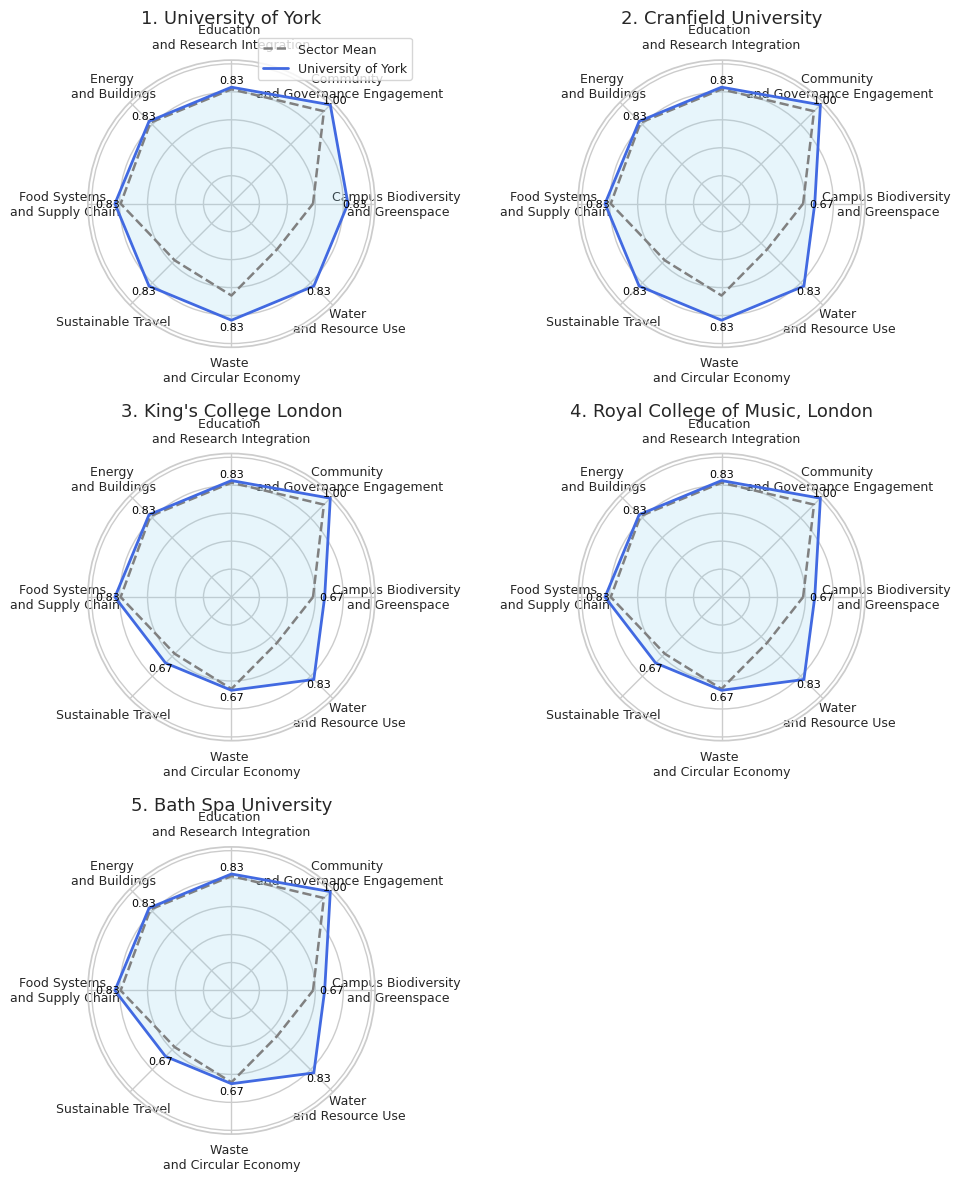

In [ ]:
from math import pi
import matplotlib.pyplot as plt

def plot_topN_radar_with_mean(merged, pivot_df_section2, scoring_cols, top_n=5, n_cols=2):
    """
    Plot radar charts for the top N universities, each with the sector mean curve for comparison.

    Args:
        merged: DataFrame with total_score and document columns.
        pivot_df_section2: Wide-format DataFrame of Section2 scores.
        scoring_cols: List of the 8 scoring dimensions.
        top_n: Number of top universities to plot.
        n_cols: Number of columns in the subplot grid.
    """
    # Calculate sector mean
    mean_scores = pivot_df_section2[scoring_cols].mean().tolist()
    mean_scores += mean_scores[:1]
    N = len(scoring_cols)
    angles = [n / float(N) * 2 * pi for n in range(N)] + [0]
    # Get top N university names
    top_docs = merged.sort_values('total_score', ascending=False)['document'].head(top_n)
    n_rows = (top_n + n_cols - 1) // n_cols
    fig = plt.figure(figsize=(5 * n_cols, 4 * n_rows))
    for i, doc in enumerate(top_docs):
        data = pivot_df_section2.loc[doc, scoring_cols].values.tolist()
        data += data[:1]
        ax = plt.subplot(n_rows, n_cols, i+1, polar=True)
        # Plot sector mean (gray dashed line)
        ax.plot(angles, mean_scores, linewidth=1.8, linestyle='dashed', color='gray', label='Sector Mean')
        # Plot university score (blue solid line)
        ax.plot(angles, data, linewidth=2, linestyle='solid', label=doc.replace('.txt',''), color='royalblue')
        ax.fill(angles, data, 'skyblue', alpha=0.2)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels([c.replace('and', '\nand') for c in scoring_cols], size=9)
        # Add value labels to each vertex
        for angle, value in zip(angles[:-1], data[:-1]):
            ax.text(angle, value + 0.05, f"{value:.2f}", color='black', fontsize=8, ha='center', va='center')
        ax.set_title(f"{i+1}. {doc.replace('.txt','')}", size=13, y=1.10)
        ax.set_yticklabels([])
        # Show legend only on the first subplot
        if i == 0:
            ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.10), fontsize=9)
    plt.tight_layout()
    plt.show()

# Get the 8 scoring dimensions
scoring_cols = [col for col in pivot_df_section2.columns if col in normalized_weights]
plot_topN_radar_with_mean(merged, pivot_df_section2, scoring_cols, top_n=5, n_cols=2)

3.2 Justification of each dimension for the top 5 scoring universities

In [ ]:
def justification_numbered(texts):
    texts = [str(t) for t in texts if pd.notna(t) and str(t).strip() != '']
    return ' '.join([f'({i+1}) {t}' for i, t in enumerate(texts)])

justification_df = (
    df_section2
    .groupby(['document', 'dimension'])['justification']
    .apply(justification_numbered)
    .unstack()
)

In [ ]:
import pandas as pd
from IPython.display import HTML, display

# 1. Get the list of top 5 universities
top5_docs = merged['document'].head(5).tolist()

# 2. Filter justification_df for the top 5 and output as a new DataFrame
justification_table = justification_df.loc[top5_docs, scoring_cols]

# 3. Adjust pandas display settings for better readability
pd.set_option('display.max_colwidth', 1000)      # Max characters per cell
pd.set_option('display.max_columns', None)       # Show all columns
pd.set_option('display.width', 2000)             # Max display width (characters)

# 4. Set HTML table styles for fixed column width and text wrapping
styles = [
    dict(selector="th, td", props=[("max-width", "400px"), ("white-space", "pre-wrap")]),
    dict(selector="table", props=[("table-layout", "fixed"), ("width", "100%")])
]
html = justification_table.style.set_table_styles(styles).to_html()
display(HTML(html))

3.3 Box plots of universities distribution for each dimension


*   Objective: Allow users to see the score distribution and variability of each industry across dimensions.
*   Purpose: High/low/large variation in scores → indicates the level of competition (“involution”) and how easily differences can be made within each dimension.



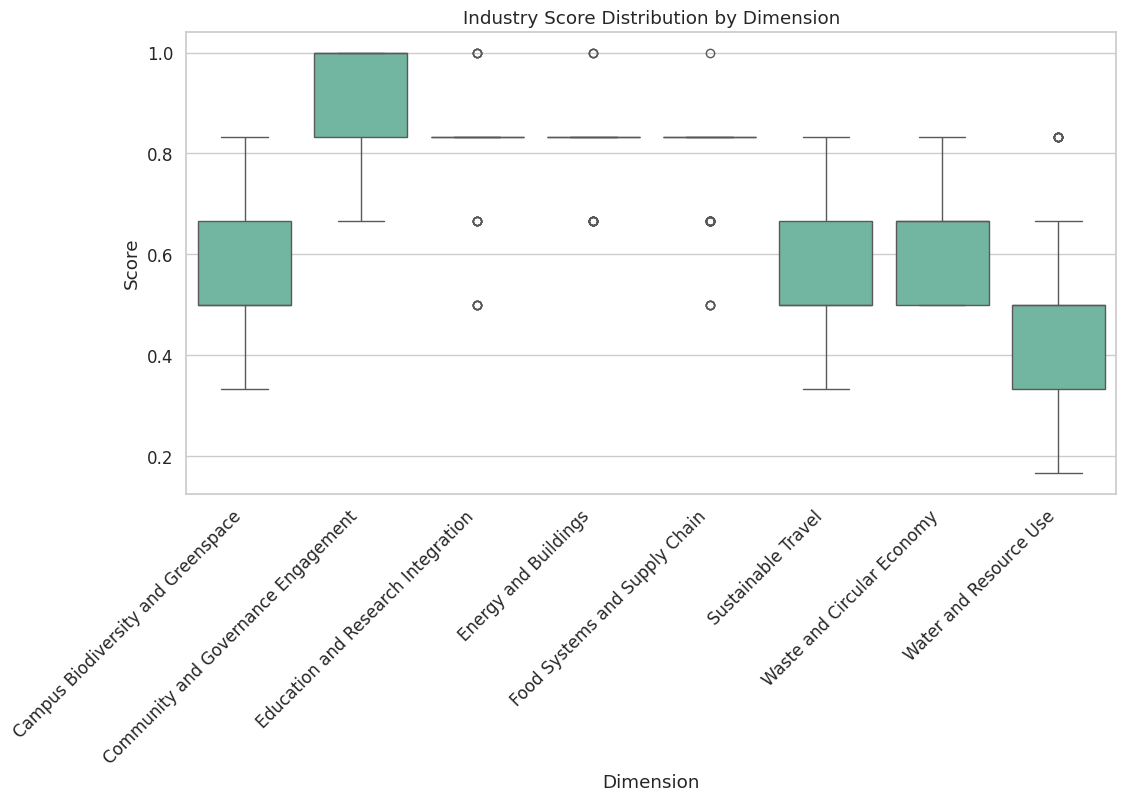

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

melted = pivot_df_section2[scoring_cols].reset_index().melt(id_vars='document', var_name='Dimension', value_name='Score')
plt.figure(figsize=(12,6))
sns.boxplot(x='Dimension', y='Score', data=melted)
plt.xticks(rotation=45, ha='right')
plt.title("Industry Score Distribution by Dimension")
plt.show()

3.4 University industry benchmarks: the highest score and its justification for each dimension

In [ ]:
benchmark_rows = []

def justification_numbered(texts):
    texts = [str(t) for t in texts if pd.notna(t) and str(t).strip() != '']
    return ' '.join([f'({i+1}) {t}' for i, t in enumerate(texts)])

justification_df = (
    df_section2
    .groupby(['document', 'dimension'])['justification']
    .apply(justification_numbered)
    .unstack()
)

for dim in scoring_cols:
    top_doc = pivot_df_section2[dim].idxmax()
    top_score = pivot_df_section2[dim].max()
    justification = justification_df.loc[top_doc, dim] if (top_doc in justification_df.index) else ""
    benchmark_rows.append({
        "Dimension": dim,
        "Top University": top_doc.replace('.txt', ''),
        "Score": round(top_score, 3),
        "Justification": justification
    })

benchmark_table = pd.DataFrame(benchmark_rows)
display(benchmark_table)

Dimension          Top University  Score                                                                                                                                                                                                                                                                                                                                                            Justification
0   Campus Biodiversity and Greenspace     Falmouth University  0.833                                                  (1) A comprehensive biodiversity protection plan is in place, with specific species and habitat targets. (2) Greenery expansion projects are underway, with clear timelines and objectives. (3) There is a mention of ecological collaboration with the community, but no specific projects or partners are identified.
1  Community and Governance Engagement      Abertay University  1.000                                                                          (1) A sustainability governance committee is established, actively overseeing initiatives. (2) Collaboration with students and staff is facilitated through regular forums and workshops. (3) Sustainability reports are publicly disclosed annually, ensuring transparency and accountability.
2   Education and Research Integration      Abertay University  1.000                                                                                                       (1) Sustainability is integrated into the curriculum across multiple disciplines. (2) The university supports numerous sustainability research projects with dedicated funding. (3) Training programs for sustainability are available to both staff and students.
3                 Energy and Buildings      Abertay University  1.000  (1) The university has a detailed plan for retrofitting buildings with energy-efficient technologies and has set a timeline for completion by 2025. (2) Regular energy audits are conducted annually, and specific targets for energy reduction are in place. (3) All new constructions adhere to BREEAM Excellent standards, ensuring high sustainability performance.
4        Food Systems and Supply Chain      Abertay University  1.000                                                                                     (1) The university actively promotes plant-based diets through campus initiatives and dining options. (2) There are clear strategies and targets for reducing food waste by 50% by 2025. (3) Sustainable procurement policies are in place, prioritizing local and seasonal produce.
5                   Sustainable Travel  Aberystwyth University  0.833                       (1) Policies are in place to encourage walking, cycling, and public transport, including infrastructure improvements and incentives. (2) There is an intent to reduce air travel, but no specific targets or strategies are described. (3) The university has set a target to electrify its vehicle fleet by 2030, with interim goals and metrics.
6           Waste and Circular Economy      Abertay University  0.833                                                                                                              (1) Comprehensive waste separation and recycling systems are implemented across campus. (2) The university has set a target to reduce waste by 30% by 2024. (3) Circular economy initiatives are mentioned, but specific actions or goals are not detailed.
7               Water and Resource Use     Bath Spa University  0.833                                                          (1) The university has set specific targets to reduce water usage by 25% over the next five years. (2) Water recycling measures are mentioned as a goal, but no specific projects or timelines are detailed. (3) Water-saving devices are actively promoted and installed in all new and refurbished buildings.

For citycouncils:

(1) Radar charts of the 8 dimensions for the top 5 scoring citycoucils

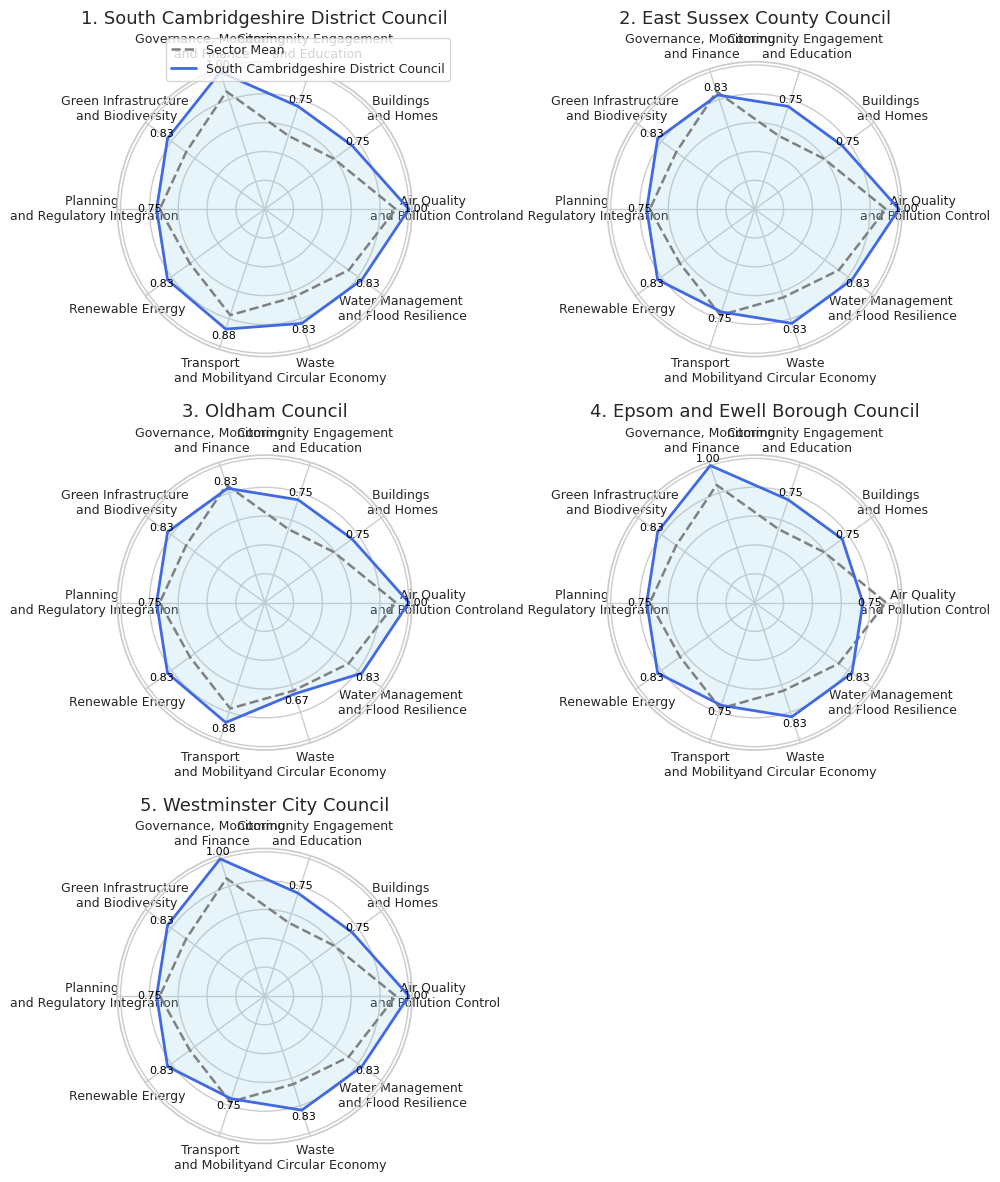

In [ ]:
from math import pi
import matplotlib.pyplot as plt

def plot_topN_radar_with_mean_council(merged_council, pivot_df_section2_council, scoring_cols_council, top_n=5, n_cols=2):
    """
    Plot radar charts for the top N city councils, each with the sector mean curve for comparison.

    Args:
        merged_council: DataFrame containing 'total_score' and 'document' columns.
        pivot_df_section2_council: Wide-format DataFrame of Section 2 scores.
        scoring_cols_council: List of the 10 scoring dimensions.
        top_n: Number of top councils to plot.
        n_cols: Number of columns in the subplot grid.
    """
    # Calculate sector mean
    mean_scores = pivot_df_section2_council[scoring_cols_council].mean().tolist()
    mean_scores += mean_scores[:1]
    N = len(scoring_cols_council)
    angles = [n / float(N) * 2 * pi for n in range(N)] + [0]
    # Get top N council names
    top_docs = merged_council.sort_values('total_score', ascending=False)['document'].head(top_n)
    n_rows = (top_n + n_cols - 1) // n_cols
    fig = plt.figure(figsize=(5 * n_cols, 4 * n_rows))
    for i, doc in enumerate(top_docs):
        data = pivot_df_section2_council.loc[doc, scoring_cols_council].values.tolist()
        data += data[:1]
        ax = plt.subplot(n_rows, n_cols, i+1, polar=True)
        # Plot sector mean (gray dashed line)
        ax.plot(angles, mean_scores, linewidth=1.8, linestyle='dashed', color='gray', label='Sector Mean')
        # Plot council score (blue solid line)
        ax.plot(angles, data, linewidth=2, linestyle='solid', label=doc.replace('.txt',''), color='royalblue')
        ax.fill(angles, data, 'skyblue', alpha=0.2)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels([c.replace('and', '\nand') for c in scoring_cols_council], size=9)
        # Add value labels to each vertex
        for angle, value in zip(angles[:-1], data[:-1]):
            ax.text(angle, value + 0.05, f"{value:.2f}", color='black', fontsize=8, ha='center', va='center')
        ax.set_title(f"{i+1}. {doc.replace('.txt','')}", size=13, y=1.10)
        ax.set_yticklabels([])
        # Show legend only on the first subplot
        if i == 0:
            ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.10), fontsize=9)
    plt.tight_layout()
    plt.show()

# Get the 10 scoring dimensions for city councils (corresponding to normalized_weights_council)
scoring_cols_council = [col for col in pivot_df_section2_council.columns if col in normalized_weights_council]
plot_topN_radar_with_mean_council(merged_council, pivot_df_section2_council, scoring_cols_council, top_n=5, n_cols=2)

(2) Justification of each dimension for the top 5 scoring universities

In [ ]:
def justification_numbered(texts):
    texts = [str(t) for t in texts if pd.notna(t) and str(t).strip() != '']
    return ' '.join([f'({i+1}) {t}' for i, t in enumerate(texts)])

justification_df = (
    df_section2_council
    .groupby(['document', 'dimension'])['justification']
    .apply(justification_numbered)
    .unstack()
)

import pandas as pd
from IPython.display import HTML, display

# 1. Get the list of the top 5 universities
top5_docs = merged_council['document'].head(5).tolist()

# 2. Filter justification_df for the top 5 and output as a new DataFrame
justification_table = justification_df.loc[top5_docs, scoring_cols_council]

# 3. Adjust pandas display settings for better readability
pd.set_option('display.max_colwidth', 1000)      # Maximum characters per cell
pd.set_option('display.max_columns', None)       # Show all columns
pd.set_option('display.width', 2000)             # Maximum display width (characters)

# 4. Set HTML table styles for fixed column width and text wrapping
styles = [
    dict(selector="th, td", props=[("max-width", "400px"), ("white-space", "pre-wrap")]),
    dict(selector="table", props=[("table-layout", "fixed"), ("width", "100%")])
]
html = justification_table.style.set_table_styles(styles).to_html()
display(HTML(html))

(3) Box plots of city councils distribution for each dimension

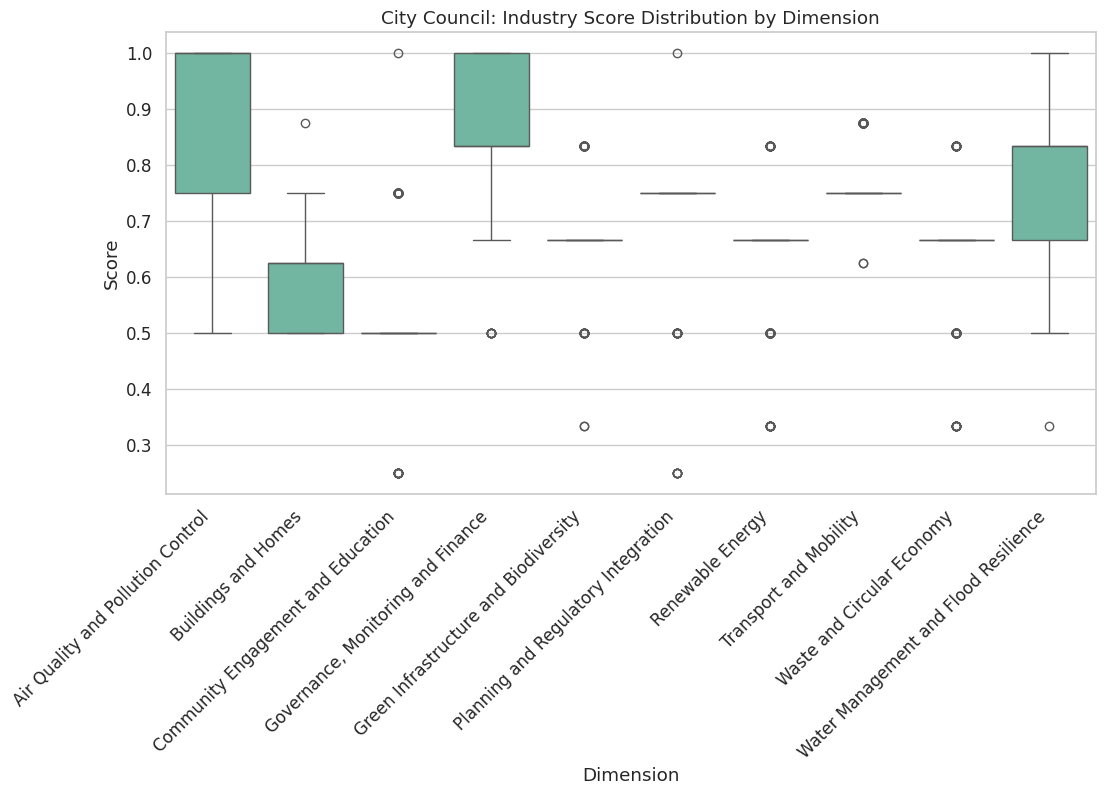

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the wide-format DataFrame for city council
melted_council = pivot_df_section2_council[scoring_cols_council].reset_index().melt(
    id_vars='document', var_name='Dimension', value_name='Score'
)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Dimension', y='Score', data=melted_council)
plt.xticks(rotation=45, ha='right')
plt.title("City Council: Industry Score Distribution by Dimension")
plt.show()

(4) City council industry benchmarks: the highest score and its justification for each dimension

In [ ]:
benchmark_rows_council = []

justification_df_council = (
    df_section2_council
    .groupby(['document', 'dimension'])['justification']
    .apply(justification_numbered)
    .unstack()
)

for dim in scoring_cols_council:
    top_doc = pivot_df_section2_council[dim].idxmax()
    top_score = pivot_df_section2_council[dim].max()
    justification = justification_df_council.loc[top_doc, dim] if (top_doc in justification_df_council.index) else ""
    benchmark_rows_council.append({
        "Dimension": dim,
        "Top City Council": top_doc.replace('.txt', ''),
        "Score": round(top_score, 3),
        "Justification": justification
    })

benchmark_table_council = pd.DataFrame(benchmark_rows_council)
display(benchmark_table_council)

Dimension                                   Top City Council  Score                                                                                                                                                                                                                                                                                                                                                                                                             Justification
0      Air Quality and Pollution Control                                      Aberdeen City  1.000                                                                                                                                                                                      (1) Air quality improvement targets are clearly defined with specific pollutants and reduction percentages. (2) Air Quality Management Areas (AQMAs) or similar control zones are established with clear boundaries and regulations.
1                    Buildings and Homes              Hinckley and Bosworth Borough Council  0.875                   (1) The document outlines a comprehensive retrofit policy for existing homes with clear targets and timelines. (2) Energy efficiency standards for new buildings are clearly specified and mandatory. (3) Low-carbon heating is mentioned as a goal, but specific measures or incentives are not detailed. (4) Residential developments are required to assess carbon impact through a defined process.
2     Community Engagement and Education                 Wigan Metropolitan Borough Council  1.000                                                                                                                                                                                                                                   (1) Carbon literacy training is provided with specific programs and resources available. (2) School and youth engagement mechanisms are in place with active participation initiatives.
3     Governance, Monitoring and Finance                                      Aberdeen City  1.000                                                                                                         (1) A Net Zero target with a specific timeline is established and integrated into the council's strategic plan. (2) There is a clear framework for annual monitoring and reporting of progress with specific indicators. (3) Specific budget and funding allocations are outlined for climate action initiatives.
4  Green Infrastructure and Biodiversity  Babergh District Council and Mid Suffolk District  0.833                                                                                                                                                                                                                (1) There is a clear plan to expand urban greenery. (2) Biodiversity targets are mentioned, but not clearly defined. (3) Community participation in nature restoration is promoted with specific programs.
5    Planning and Regulatory Integration              Hinckley and Bosworth Borough Council  1.000                                                                                                                                                                                                                                   (1) Climate policies are integrated into planning frameworks with specific policy tools. (2) Policy tools are used to control development-related carbon impacts with clear guidelines.
6                       Renewable Energy        Bournemouth, Christchurch and Poole Council  0.833                                                                                                         (1) The document provides strong support for local renewable energy deployment with clear strategies and partnerships. (2) Solar energy deployment targets are mentioned but lack detailed numerical goals. (3) Community energy projects are actively promoted with spec

0709更新：

University: 客户和Top Performer/行业标杆对比表格

In [ ]:
import openai

def get_gpt4o_action_plan(your_just, top_just, dim, api_key):
    prompt = (
        f"In the climate action assessment, the focus dimension is: '{dim}'.\n"
        f"Here is the justification provided by the user's institution:\n{your_just}\n"
        f"Here is the justification provided by the top performer in this dimension:\n{top_just}\n"
        "Please do the following:\n"
        "1. Briefly analyze the main differences between the user's justification and the top performer.\n"
        "2. Based on this comparison, provide a targeted action plan (2–3 concrete steps) that the user's institution can take to close the gap and improve its performance in this dimension. Please be specific and practical in your suggestions.\n"
        "**Keep your answer concise and do NOT exceed 120 words in total.**\n"
        "Format your answer as:\n"
        "- Gap Analysis:\n  (Your analysis here)\n"
        "- Action Plan:\n  1.\n  2.\n  3.\n"
    )

    try:
        client = openai.OpenAI(api_key=api_key)
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.6,
            max_tokens=500
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"(No Action Plan generated or error: {e})"

In [ ]:
import html

def get_percentile_label(percentile):
    if percentile < 0.25:
        return 'Bottom 25%'
    elif percentile < 0.5:
        return '25–50%'
    elif percentile < 0.75:
        return '50–75%'
    elif percentile < 0.9:
        return '75–90%'
    else:
        return 'Top 10%'

api_key = ""

def join_numbered_justs(just_list):
    if len(just_list) == 0:
        return ''
    return ' '.join([f'({i+1}) {j}' for i, j in enumerate(just_list)])

def format_multiline(text):
    if not isinstance(text, str):
        return ""
    return html.escape(text).replace('\n', '<br>')

def show_university_ranking_and_benchmark_v2(_):
    with output_user:
        clear_output()
        selected_uni = uni_dropdown.value
        my_doc = selected_uni + '.txt'
        my_row = merged[merged['document'] == my_doc].iloc[0]

        # ---- Percentile calculation section ----
        percentile_dict = {}
        percentile_explanation = []
        for dim in scoring_cols:
            all_scores = pivot_df_section2[dim]
            my_score = all_scores.loc[my_doc]
            percentile = (all_scores < my_score).sum() / len(all_scores)
            if my_score == all_scores.max():
                percentile = 0.99
            label = get_percentile_label(percentile)
            percentile_dict[dim] = {'percentile': percentile, 'level': label}

            # Explanation for Percentile Band
            q75, q25 = np.percentile(all_scores, [75, 25])
            iqr = q75 - q25
            if iqr < 0.1:
                percentile_explanation.append("Scores are highly concentrated; percentile may be affected by clustering.")
            elif percentile < 0.25:
                percentile_explanation.append("Your score is significantly below the sector average.")
            elif percentile > 0.90:
                percentile_explanation.append("Your score is among the top 10% in the sector; excellent performance.")
            else:
                percentile_explanation.append("Your score is close to the sector average.")

        # Rank and basic information output
        rank = merged.sort_values('total_score', ascending=False).reset_index().index[merged['document'] == my_doc][0] + 1
        total_count = len(merged)
        print(f"🏫 **{selected_uni}** is ranked **#{rank} / {total_count}** in the current weighting scenario.")
        print(f"\nSection 1 (Structural Quality): {my_row['normalized_s1']:.3f}")
        print(f"Section 2 (Content Quality): {my_row['weighted_s2']:.3f}")
        print(f"Overall MCDA Score: {my_row['total_score']:.3f}\n")

        # Sector top performer
        top_row = merged.loc[merged['total_score'].idxmax()]
        print(f"🏆 Top Performer: {top_row['document'].replace('.txt','')}")
        print(f"Section 1 (Structural Quality): {top_row['normalized_s1']:.3f}")
        print(f"Section 2 (Content Quality): {top_row['weighted_s2']:.3f}")
        print(f"Overall MCDA Score: {top_row['total_score']:.3f}\n")

        # Overall scores table
        comp = pd.DataFrame({
            'Your Institution': [my_row['normalized_s1'], my_row['weighted_s2'], my_row['total_score']],
            'Top Performer': [top_row['normalized_s1'], top_row['weighted_s2'], top_row['total_score']]
        }, index=['Section 1', 'Section 2', 'MCDA Score'])
        display(comp)

        # Section 2: Detailed dimension scores + explanations
        print("\nSection 2 Dimension Scores & Percentile Bands:")
        section2_my = pivot_df_section2.loc[my_doc, scoring_cols]
        section2_top = pivot_df_section2.loc[top_row['document'], scoring_cols]
        percentiles = [percentile_dict[dim]['percentile'] for dim in scoring_cols]
        percentile_band = [percentile_dict[dim]['level'] for dim in scoring_cols]

        # Explanation relative to the Top Performer
        explanation_top = []
        for dim in scoring_cols:
            my_score = section2_my[dim]
            top_score = section2_top[dim]
            diff = top_score - my_score
            if diff <= 0.02:
                explanation_top.append("You are close to the Top Performer in this dimension.")
            elif diff <= 0.08:
                explanation_top.append(f"Slightly below the Top Performer (diff: {diff:.2f}). Consider learning from their best practices.")
            else:
                explanation_top.append(f"Significant gap to Top Performer (diff: {diff:.2f}). Review top practices for improvement.")

        dim_table = pd.DataFrame({
            'Your Institution': section2_my.values,
            'Top Performer': section2_top.values,
            'Explanation (vs Top Performer)': explanation_top,
            'Percentile': percentiles,
            'Percentile Band': percentile_band,
            'Explanation (for Percentile Band)': percentile_explanation,
        }, index=scoring_cols)
        display(dim_table.style.format({
            'Your Institution':'{:.3f}',
            'Top Performer':'{:.3f}',
            'Percentile':'{:.0%}'
        }))

        # -------- Justification comparison for Significant gaps only + LLM Action Plan ----------
        gap_dims = [scoring_cols[i] for i, exp in enumerate(explanation_top) if exp.startswith("Significant gap")]
        justification_comparison = []
        for dim in gap_dims:
            my_just = df_section2[(df_section2['document'] == my_doc) & (df_section2['dimension'] == dim)]
            top_just = df_section2[(df_section2['document'] == top_row['document']) & (df_section2['dimension'] == dim)]
            my_just_str = join_numbered_justs(my_just['justification'].tolist())
            top_just_str = join_numbered_justs(top_just['justification'].tolist())

            # Invoke LLM to get suggestions on improving your client's own climate action plan
            action_plan = get_gpt4o_action_plan(my_just_str, top_just_str, dim, api_key)

            justification_comparison.append({
                'Dimension': dim,
                'Your Score': section2_my[dim],
                'Top Performer Score': section2_top[dim],
                'Your Justification': my_just_str,
                'Top Performer Justification': top_just_str,
                'Action Plan Suggestion': action_plan
            })
        if justification_comparison:
            justification_df = pd.DataFrame(justification_comparison)
            print("\nJustification Comparison for Dimensions with a Significant Gap to Top Performer (including Action Plan):")
            justification_df['Your Justification'] = justification_df['Your Justification'].apply(format_multiline)
            justification_df['Top Performer Justification'] = justification_df['Top Performer Justification'].apply(format_multiline)
            justification_df['Action Plan Suggestion'] = justification_df['Action Plan Suggestion'].apply(format_multiline)
            display(HTML(justification_df.to_html(escape=False)))
        else:
            print("\nNo dimensions with a significant gap to Top Performer.")

        print("\nPercentile band shows your relative position among all institutions. Focus on large gaps to the Top Performer or on high-weighted dimensions.")

show_button.on_click(show_university_ranking_and_benchmark_v2)

In [ ]:
uni_dropdown = widgets.Dropdown(
    options=[doc.replace('.txt','') for doc in merged['document']],
    description='Select University:'
)

show_button = widgets.Button(
    description="Show Analysis",
    button_style='success'
)
output_user = widgets.Output()

In [ ]:
show_button.on_click(show_university_ranking_and_benchmark_v2)

display(uni_dropdown, show_button, output_user)

Dropdown(description='Select University:', options=('University of York', 'Cranfield University', 'University …

Button(button_style='success', description='Show Analysis', style=ButtonStyle())

Output()

For citycouncil：

In [ ]:
import html
import pandas as pd
import numpy as np
from IPython.display import display, clear_output, HTML

council_scoring_cols = [
    'Buildings and Homes',
    'Renewable Energy',
    'Transport and Mobility',
    'Waste and Circular Economy',
    'Green Infrastructure and Biodiversity',
    'Water Management and Flood Resilience',
    'Air Quality and Pollution Control',
    'Community Engagement and Education',
    'Governance, Monitoring and Finance',
    'Planning and Regulatory Integration'
]

def get_percentile_label(percentile):
    if percentile < 0.25:
        return 'Bottom 25%'
    elif percentile < 0.5:
        return '25–50%'
    elif percentile < 0.75:
        return '50–75%'
    elif percentile < 0.9:
        return '75–90%'
    else:
        return 'Top 10%'

def join_numbered_justs(just_list):
    if len(just_list) == 0:
        return ''
    return ' '.join([f'({i+1}) {j}' for i, j in enumerate(just_list)])

def format_multiline(text):
    if not isinstance(text, str):
        return ""
    return html.escape(text).replace('\n', '<br>')

def show_citycouncil_ranking_and_benchmark(_):
    with output_alpha_council:
        clear_output()
        selected_council = council_dropdown.value
        my_doc = selected_council + '.txt'
        my_row = merged_council[merged_council['document'] == my_doc].iloc[0]

        # ------ Percentile analysis ------
        percentile_dict = {}
        percentile_explanation = []
        for dim in council_scoring_cols:
            all_scores = pivot_df_section2_council[dim]
            my_score = all_scores.loc[my_doc]
            percentile = (all_scores < my_score).sum() / len(all_scores)
            if my_score == all_scores.max():
                percentile = 0.99
            label = get_percentile_label(percentile)
            percentile_dict[dim] = {'percentile': percentile, 'level': label}

            # Brief explanation (can be further refined)
            q75, q25 = np.percentile(all_scores, [75, 25])
            iqr = q75 - q25
            if iqr < 0.1:
                percentile_explanation.append("Scores are highly concentrated; percentile results may be affected by clustering.")
            elif percentile < 0.25:
                percentile_explanation.append("Significantly below sector average in this dimension.")
            elif percentile > 0.90:
                percentile_explanation.append("Top 10% of the sector—excellent performance!")
            else:
                percentile_explanation.append("Close to sector average.")

        # ------ Ranking and key information ------
        rank = merged_council.sort_values('total_score', ascending=False).reset_index().index[merged_council['document'] == my_doc][0] + 1
        total_count = len(merged_council)
        print(f"🏙️ **{selected_council}** is ranked **#{rank} / {total_count}** in the current weighting scenario.")
        print(f"\nSection 1 (Structural Quality): {my_row['normalized_s1']:.3f}")
        print(f"Section 2 (Content Performance): {my_row['weighted_s2']:.3f}")
        print(f"Overall MCDA Score: {my_row['total_score']:.3f}\n")

        # ---- Top Performer ----
        top_row = merged_council.iloc[0]
        print(f"🏆 Sector Top Performer: {top_row['document'].replace('.txt','')}")
        print(f"Section 1: {top_row['normalized_s1']:.3f}")
        print(f"Section 2: {top_row['weighted_s2']:.3f}")
        print(f"MCDA Score: {top_row['total_score']:.3f}\n")

        # Overall comparison table
        comp = pd.DataFrame({
            'Your Council': [my_row['normalized_s1'], my_row['weighted_s2'], my_row['total_score']],
            'Sector Top Performer': [top_row['normalized_s1'], top_row['weighted_s2'], top_row['total_score']]
        }, index=['Section 1', 'Section 2', 'MCDA Score'])
        display(comp)

        # ---- Section 2: Detailed dimension scores and explanations ----
        print("\nSection 2 Dimension Scores & Percentile Bands:")
        section2_my = pivot_df_section2_council.loc[my_doc, council_scoring_cols]
        section2_top = pivot_df_section2_council.loc[top_row['document'], council_scoring_cols]
        percentiles = [percentile_dict[dim]['percentile'] for dim in council_scoring_cols]
        percentile_band = [percentile_dict[dim]['level'] for dim in council_scoring_cols]

        # Gap explanation vs. Top Performer
        explanation_top = []
        for dim in council_scoring_cols:
            my_score = section2_my[dim]
            top_score = section2_top[dim]
            diff = top_score - my_score
            if diff <= 0.02:
                explanation_top.append("Close to the sector top performer.")
            elif diff <= 0.08:
                explanation_top.append(f"Slightly below top performer (difference: {diff:.2f}). Consider learning from their best practices.")
            else:
                explanation_top.append(f"Significant gap to top performer (difference: {diff:.2f}). Priority area for improvement.")

        dim_table = pd.DataFrame({
            'Your Council': section2_my.values,
            'Sector Top Performer': section2_top.values,
            'Explanation (vs Top Performer)': explanation_top,
            'Percentile': percentiles,
            'Percentile Band': percentile_band,
            'Percentile Explanation': percentile_explanation,
        }, index=council_scoring_cols)
        display(dim_table.style.format({
            'Your Council':'{:.3f}',
            'Sector Top Performer':'{:.3f}',
            'Percentile':'{:.0%}'
        }))

        # ---- Justification comparison and AI suggestion (optional) ----
        gap_dims = [council_scoring_cols[i] for i, exp in enumerate(explanation_top) if exp.startswith("Significant gap")]
        justification_comparison = []
        for dim in gap_dims:
            my_just = df_section2_council[(df_section2_council['document'] == my_doc) & (df_section2_council['dimension'] == dim)]
            top_just = df_section2_council[(df_section2_council['document'] == top_row['document']) & (df_section2_council['dimension'] == dim)]
            my_just_str = join_numbered_justs(my_just['justification'].tolist())
            top_just_str = join_numbered_justs(top_just['justification'].tolist())
            action_plan = get_gpt4o_action_plan(my_just_str, top_just_str, dim, api_key)
            justification_comparison.append({
                'Dimension': dim,
                'Your Council Score': section2_my[dim],
                'Top Performer Score': section2_top[dim],
                'Your Justification': my_just_str,
                'Top Performer Justification': top_just_str,
                'Action Plan Suggestion': action_plan
            })
        if justification_comparison:
            justification_df = pd.DataFrame(justification_comparison)
            print("\nDimensions with Significant Gap to Top Performer (with justifications and suggestions):")
            justification_df['Your Justification'] = justification_df['Your Justification'].apply(format_multiline)
            justification_df['Top Performer Justification'] = justification_df['Top Performer Justification'].apply(format_multiline)
            justification_df['Action Plan Suggestion'] = justification_df['Action Plan Suggestion'].apply(format_multiline)
            display(HTML(justification_df.to_html(escape=False)))
        else:
            print("\nNo dimensions with a significant gap to the sector top performer.")

        print("\nPercentile bands reflect your relative position in the sector. Focus on dimensions with large gaps to the top performer or high-weighted areas.")

In [ ]:
# Define council_dropdown
council_dropdown = widgets.Dropdown(
    options=[doc.replace('.txt','') for doc in merged_council['document']],
    description='Select Council:'
)

show_button_council = widgets.Button(description="Show Analysis", button_style='info')
show_button_council.on_click(show_citycouncil_ranking_and_benchmark)

display(council_dropdown, show_button_council, output_alpha_council)

Dropdown(description='Select Council:', options=('South Cambridgeshire District Council', 'Westminster City Co…

Button(button_style='info', description='Show Analysis', style=ButtonStyle())

Output()

后续表单

For citycouncil

In [ ]:
dimension_intros = {
    'Buildings & Homes': "Covers projects like energy efficiency retrofits, insulation, green building certifications, public and residential building upgrades. Example: insulation upgrades, window replacements, HVAC improvements.",
    'Renewable Energy': "Includes solar, wind, biomass, and other renewable energy projects. Example: solar PV, wind turbines, biomass heating.",
    'Transport & Mobility': "Low-carbon transportation projects and mobility upgrades. Example: EV charging infrastructure, public transport upgrades, bike lane construction.",
    'Waste & Circular Economy': "Waste reduction, recycling, and resource recovery projects. Example: composting, recycling centers, waste-to-energy plants.",
    'Green Infrastructure & Biodiversity': "Urban green spaces and biodiversity conservation. Example: park creation, green roofs, wetland restoration.",
    'Water Management & Flood Resilience': "Water conservation and flood resilience initiatives. Example: rainwater harvesting, sponge city, drainage upgrades.",
    'Air Quality & Pollution Control': "Air pollution control and emission reduction. Example: industrial emission reduction, clean fuel switch, vehicle emission controls.",
    'Community Engagement & Education': "Climate action education and public participation. Example: climate awareness campaigns, workshops, community activities.",
    'Governance, Monitoring & Finance': "Climate governance, policy, monitoring, and finance. Example: carbon monitoring, green finance, climate action reporting.",
    'Planning & Regulation Integration': "Integration of climate goals into planning and regulation. Example: low-carbon urban plans, green building codes, land-use management."
}


In [2]:
def build_dimension_section(dim_name, fields, intro):
    """
    Build a single dimension (sector) section with an introduction.
    """
    widgets_list = [
        widgets.HTML(
            f"<div style='color:#aaa; font-size:14px; margin-bottom:12px;'>{intro}</div>"
        )
    ]
    for k, v in fields.items():
        widgets_list.append(
            widgets.HBox([
                widgets.Label(value=k, layout=widgets.Layout(width='48%')), v
            ])
        )
    return widgets.VBox(
        widgets_list,
        layout=widgets.Layout(
            background='#23272b',
            padding='14px 10px 8px 10px',
            margin='0 0 18px 0',
            border_radius='0 0 8px 8px'
        )
    )

def build_dimension_accordion(dimensions, dimension_intros):
    """
    Build the Accordion section for all dimensions.
    """
    accordion_items = []
    for dim_name, fields in dimensions.items():
        intro = dimension_intros.get(dim_name, "")
        accordion_items.append(build_dimension_section(dim_name, fields, intro))
    accordion = widgets.Accordion(children=accordion_items)
    for i, dim_name in enumerate(dimensions.keys()):
        accordion.set_title(i, dim_name)
    return accordion

def build_susie_form(overall_section, overall_form, dimensions_section, accordion):
    """
    Assemble the complete form.
    """
    form_items = [
        overall_section,
        overall_form,
        widgets.HTML("<hr>"),
        dimensions_section,
        accordion
    ]
    return widgets.VBox(form_items)

In [7]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

# ========== 1. Section Description and Fields ==========

overall_section = widgets.HTML(
    value="""
    <div style='background:transparent; padding:14px 8px; margin-bottom:10px; border-left:4px solid #1976d2;'>
        <h3 style='margin:0 0 5px 0;color:#1976d2'>Overall Indicators</h3>
        <span style='color:#888;font-size:13px;'>
            Fill in overall budget, total carbon reduction, ROI, and project duration
            <b>(please use years, decimals allowed; e.g. 2.5 means 2 years and 6 months)</b>.
        </span>
    </div>
    """
)

overall_fields = {
    'Total Cost (GBP)': widgets.FloatText(),
    'Total CO2e Avoided (tons)': widgets.FloatText(),
    'Implementation Timescale (years)': widgets.FloatText(),
    'Remarks (optional)': widgets.Textarea(layout=widgets.Layout(width="300px", height="40px"))
}

overall_form = widgets.VBox(
    [widgets.HBox([widgets.Label(value=k, layout=widgets.Layout(width="48%")), v]) for k, v in overall_fields.items()],
    layout=widgets.Layout(
        background='#f3f7fa',
        padding='16px 10px 8px 10px',
        margin='0 0 20px 0',
        border_radius='0 0 8px 8px'
    )
)

dimensions_section = widgets.HTML(
    value="""
    <div style='background:transparent; padding:12px 8px; margin-bottom:10px; border-left:4px solid #388e3c;'>
        <h3 style='margin:0 0 5px 0; color:#388e3c;'>Dimensions / Sectoral Indicators</h3>
        <span style='color:#666;font-size:13px;'>The following are the ten domain/dimension indicators. Fill in as applicable, and you may add remarks.</span>
    </div>
    """
)

# ========== 1.1 Dimensions and Their Intros ==========

dimensions = {
    'Energy & Buildings': {
        'Total energy use or reduction (MWh/year)': widgets.FloatText(),
        'Renewable energy capacity installed (kWp/MW)': widgets.FloatText()
    },
    'Transport & Air Quality': {
        'Number of zero/low-emission vehicles or chargers (annual/total)': widgets.IntText(),
        'NO2/PM2.5 annual average or reduction (%)': widgets.FloatText()
    },
    'Waste & Circular Economy': {
        'Recycling rate (%)': widgets.FloatText(),
        'Tonnes of waste diverted from landfill (t/year)': widgets.FloatText()
    },
    'Nature, Open Space & Biodiversity': {
        'Hectares of new/enhanced greenspace (annual/total)': widgets.FloatText(),
        'Number of biodiversity improvement projects': widgets.IntText()
    },
    'Community & Governance': {
        'Number of climate-related engagement/education sessions (annual)': widgets.IntText(),
        'Annual publication of progress report (Y/N)': widgets.Dropdown(options=['Yes','No'])
    }
}


dimension_intros = {
    'Energy & Buildings': (
        "Covers projects such as energy efficiency retrofits, renewable energy installations, and the adoption of green building standards. "
        "Examples include building insulation upgrades, installation of solar panels, and green certification of public buildings."
    ),
    'Transport & Air Quality': (
        "Includes low- or zero-emission vehicle deployment, development of EV infrastructure, improvements to active travel, "
        "and air quality management initiatives. Examples: expanding EV charging networks, introducing clean bus fleets, "
        "or implementing air pollution monitoring."
    ),
    'Waste & Circular Economy': (
        "Encompasses projects focused on recycling, waste diversion, reuse, and reduction of landfill. "
        "Examples include establishing recycling programs, promoting composting, or building waste-to-energy facilities."
    ),
    'Nature, Open Space & Biodiversity': (
        "Involves urban greening, biodiversity restoration, creation or enhancement of public green spaces, "
        "and implementation of nature-based solutions. Examples: park creation, wetland restoration, tree planting."
    ),
    'Community & Governance': (
        "Focuses on climate education, public engagement, reporting progress, and strengthening governance structures for climate action. "
        "Examples include organizing climate awareness workshops, conducting community engagement sessions, and publishing progress reports."
    )
}

# ========== 2. Generate Accordion and Complete Form ==========

accordion = build_dimension_accordion(dimensions, dimension_intros)
form = build_susie_form(overall_section, overall_form, dimensions_section, accordion)

# ========== 3. Button and Data Export ==========

submit_button = widgets.Button(description="Submit Form", button_style='success')
output = widgets.Output()

def on_submit(b):
    with output:
        clear_output()
        data = {}
        for k, v in overall_fields.items():
            data[k] = v.value if hasattr(v, 'value') else v.get_interact_value()
        for dim_name, fields in dimensions.items():
            for k, v in fields.items():
                data[f"{dim_name}: {k}"] = v.value if hasattr(v, 'value') else v.get_interact_value()
        df = pd.DataFrame([data])
        display(df)
        print("✅ Saved! You can copy or export the data.")
        # df.to_csv("susie_mcda_input.csv", index=False)

submit_button.on_click(on_submit)

display(widgets.HTML("<h2>SUSIE Multidimensional Quantitative Project Form (Enhanced Partition Version)</h2>"))
display(form, submit_button, output)

HTML(value='<h2>SUSIE Multidimensional Quantitative Project Form (Enhanced Partition Version)</h2>')

Button(button_style='success', description='Submit Form', style=ButtonStyle())

Output()

For university:

In [6]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

# ====== University-Specific Form Block ======
uni_overall_section = widgets.HTML(
    value="""
    <div style='background:transparent; padding:14px 8px; margin-bottom:10px; border-left:4px solid #1976d2;'>
        <h3 style='margin:0 0 5px 0;color:#1976d2'>University Overall Indicators</h3>
        <span style='color:#888;font-size:13px;'>
            Fill in the overall sustainability budget, total carbon reduction, ROI, and project duration (years, decimals allowed).
        </span>
    </div>
    """
)
uni_overall_fields = {
    'Total Cost (GBP)': widgets.FloatText(layout=widgets.Layout(width='250px')),
    'Total CO2e Avoided (tons)': widgets.FloatText(layout=widgets.Layout(width='250px')),
    'Implementation Timescale (years)': widgets.FloatText(layout=widgets.Layout(width='250px')),
    'Remarks (optional)': widgets.Textarea(layout=widgets.Layout(width='250px', height='40px'))
}


uni_overall_form = widgets.VBox(
    [widgets.HBox([widgets.Label(value=k, layout=widgets.Layout(width="48%")), v]) for k, v in uni_overall_fields.items()],
    layout=widgets.Layout(
        background='#f3f7fa',
        padding='16px 10px 8px 10px',
        margin='0 0 20px 0',
        border_radius='0 0 8px 8px'
    )
)
uni_dimensions_section = widgets.HTML(
    value="""
    <div style='background:transparent; padding:12px 8px; margin-bottom:10px; border-left:4px solid #388e3c;'>
        <h3 style='margin:0 0 5px 0; color:#388e3c;'>University Dimensions / Indicators</h3>
        <span style='color:#666;font-size:13px;'>Eight key domains for university sustainability action. Fill as appropriate.</span>
    </div>
    """
)

uni_dimensions = {
    'Campus Energy & Buildings': {
        'Annual energy use or reduction (MWh/year)': widgets.FloatText(),
        'Renewable energy capacity installed on campus (kWp/MW)': widgets.FloatText(),
    },
    'Sustainable Transport & Air Quality': {
        'Number of low-/zero-emission campus vehicles or EV chargers (annual/total)': widgets.IntText(),
        'Percentage of students/employees using sustainable commuting modes (%)': widgets.FloatText(),
    },
    'Waste & Resource Management': {
        'Recycling rate (%)': widgets.FloatText(),
        'Tonnes of waste diverted from landfill (t/year)': widgets.FloatText(),
    },
    'Biodiversity & Campus Green Space': {
        'Area of new/enhanced greenspace on campus (hectares)': widgets.FloatText(),
        'Number of campus biodiversity improvement projects': widgets.IntText(),
    },
    'Engagement, Education & Governance': {
        'Number of climate/sustainability education programs or workshops held annually': widgets.IntText(),
        'Annual publication of university climate action/progress report (Y/N)': widgets.Dropdown(options=['Yes', 'No']),
    }
}


uni_dimension_intros = {
    'Campus Energy & Buildings': (
        "Covers projects targeting energy efficiency, building retrofits, and renewable energy installation on university campuses. "
        "Examples: LED lighting upgrades, solar panel installations, BREEAM-certified new buildings."
    ),
    'Sustainable Transport & Air Quality': (
        "Includes initiatives to promote sustainable commuting, expand electric vehicle use, and improve campus air quality. "
        "Examples: bicycle facilities, electric shuttle buses, EV charging stations, air quality monitoring."
    ),
    'Waste & Resource Management': (
        "Focuses on reducing, recycling, and reusing campus waste streams. "
        "Examples: recycling programs, food waste composting, campaigns to reduce single-use plastics."
    ),
    'Biodiversity & Campus Green Space': (
        "Involves protection and enhancement of campus biodiversity, green space expansion, and nature-based solutions. "
        "Examples: wildlife-friendly landscaping, campus gardens, tree planting drives."
    ),
    'Engagement, Education & Governance': (
        "Emphasizes climate education, student and staff engagement, progress reporting, and climate governance. "
        "Examples: curriculum modules, public lectures, annual sustainability reports, student-led climate societies."
    )
}

# ====== Generate Form and Display ======
uni_accordion = build_dimension_accordion(uni_dimensions, uni_dimension_intros)
uni_form = build_susie_form(uni_overall_section, uni_overall_form, uni_dimensions_section, uni_accordion)

submit_button = widgets.Button(description="Submit Form", button_style='success')
output = widgets.Output()

def on_submit_uni(b):
    with output:
        clear_output()
        data = {}
        for k, v in uni_overall_fields.items():
            data[k] = v.value if hasattr(v, 'value') else v.get_interact_value()
        for dim_name, fields in uni_dimensions.items():
            for k, v in fields.items():
                data[f"{dim_name}: {k}"] = v.value if hasattr(v, 'value') else v.get_interact_value()
        df = pd.DataFrame([data])
        display(df)
        print("✅ Saved! You can copy or export the data.")

submit_button.on_click(on_submit_uni)

display(widgets.HTML("<h2>University Sustainability Multidimensional Project Form</h2>"))
display(uni_form, submit_button, output)

HTML(value='<h2>University Sustainability Multidimensional Project Form</h2>')

Button(button_style='success', description='Submit Form', style=ButtonStyle())

Output()